In [1]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm

In [2]:
df = pd.read_excel('ипс25.xlsx')
df.head()

,субъект,техногенные чс,природные чс,колво погибших,колво пострадавших,колво спасенных,"материальный ущерб от чс, тыс руб.",пожары,погибшие от пожаров,травмированные от пожаров,...,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,лесистость территорий,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения,численность населения
0,Республика Бурятия,1,1,0,0,0,15419.885,3850,66,81,...,92.0,64.6,63.8,6.2,106119,107,56.3,7.4,59.1,974628
1,Республика Саха (Якутия),2,1,3,14,0,1798478.370,1837,69,80,...,88.3,73.1,50.0,10.3,616285,338,66.4,6.5,67.2,997565
2,Забайкальский край,2,0,0,180,12,29950.830,6885,92,52,...,77.6,73.8,68.5,7.6,182105,132,61.5,8.7,69.5,992429
3,Камчатский край,0,1,1,1,0,0.000,850,4,12,...,87.8,73.3,42.7,2.0,90935,44,69.3,2.9,78.0,288730
4,Приморский край,3,5,5,26790,1638,7703447.740,10658,122,92,...,86.8,75.1,77.8,11.9,327860,203,63.0,3.4,78.4,1820076


In [3]:
df.isna().sum()

субъект                                                     0
техногенные чс                                              0
природные чс                                                0
колво погибших                                              0
колво пострадавших                                          0
колво спасенных                                             0
материальный ущерб от чс, тыс руб.                          0
пожары                                                      0
погибшие от пожаров                                         0
травмированные от пожаров                                   0
спасенные от пожара                                         0
материальный ущерб от пожаров, тыс руб.                     0
Сумма созданного финансового\nрезерва, млн руб.             0
израсходовано,\nмлн руб.                                    0
остаток,\nмлн руб.                                          0
размер финансового резерва\nна душу населения, руб./чел.    0
индекс п

In [4]:
#Заменяем количественные на медиану
for column in df.columns:
   if df[column].dtype == 'float64':
    median = df[column].median()
    df[column].fillna(median, inplace=True)

In [5]:
df.isna().sum()

субъект                                                     0
техногенные чс                                              0
природные чс                                                0
колво погибших                                              0
колво пострадавших                                          0
колво спасенных                                             0
материальный ущерб от чс, тыс руб.                          0
пожары                                                      0
погибшие от пожаров                                         0
травмированные от пожаров                                   0
спасенные от пожара                                         0
материальный ущерб от пожаров, тыс руб.                     0
Сумма созданного финансового\nрезерва, млн руб.             0
израсходовано,\nмлн руб.                                    0
остаток,\nмлн руб.                                          0
размер финансового резерва\nна душу населения, руб./чел.    0
индекс п

In [6]:
df['ЧС'] = df['техногенные чс'] + df['природные чс']
df['материальный ущерб от чс на душу населения'] = df['материальный ущерб от чс, тыс руб.']/df['численность населения']
df['материальный ущерб от пожаров на душу населения'] = df['материальный ущерб от пожаров, тыс руб.']/df['численность населения']
df.head()

,субъект,техногенные чс,природные чс,колво погибших,колво пострадавших,колво спасенных,"материальный ущерб от чс, тыс руб.",пожары,погибшие от пожаров,травмированные от пожаров,...,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения,численность населения,ЧС,материальный ущерб от чс на душу населения,материальный ущерб от пожаров на душу населения
0,Республика Бурятия,1,1,0,0,0,15419.885,3850,66,81,...,6.2,106119,107,56.3,7.4,59.1,974628,2,0.015821,2.460544
1,Республика Саха (Якутия),2,1,3,14,0,1798478.370,1837,69,80,...,10.3,616285,338,66.4,6.5,67.2,997565,3,1.802868,0.077181
2,Забайкальский край,2,0,0,180,12,29950.830,6885,92,52,...,7.6,182105,132,61.5,8.7,69.5,992429,2,0.030179,0.204236
3,Камчатский край,0,1,1,1,0,0.000,850,4,12,...,2.0,90935,44,69.3,2.9,78.0,288730,1,0.000000,0.005816
4,Приморский край,3,5,5,26790,1638,7703447.740,10658,122,92,...,11.9,327860,203,63.0,3.4,78.4,1820076,8,4.232487,0.106125


In [7]:
columns_to_convert = [col for col in df.columns if col != 'субъект']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 36 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   субъект                                                  85 non-null     object 
 1   техногенные чс                                           85 non-null     float64
 2   природные чс                                             85 non-null     float64
 3   колво погибших                                           85 non-null     float64
 4   колво пострадавших                                       85 non-null     float64
 5   колво спасенных                                          85 non-null     float64
 6   материальный ущерб от чс, тыс руб.                       85 non-null     float64
 7   пожары                                                   85 non-null     float64
 8   погибшие от пожаров             

In [9]:
df1 = df[['субъект', 'ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'материальный ущерб от чс на душу населения', 'материальный ущерб от чс, тыс руб.', 'индекс промышленного производства в % к 2022 г', 'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения']]
df1.head()

,субъект,ЧС,колво погибших,колво пострадавших,колво спасенных,материальный ущерб от чс на душу населения,"материальный ущерб от чс, тыс руб.",индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,...,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
0,Республика Бурятия,2.0,0.0,0.0,0.0,0.015821,15419.885,98.1,30.5,32823.0,...,5.3,58.14,92.0,64.6,6.2,106119.0,107.0,56.3,7.4,59.1
1,Республика Саха (Якутия),3.0,3.0,14.0,0.0,1.802868,1798478.370,100.8,81.3,57715.0,...,9.3,60.30,88.3,73.1,10.3,616285.0,338.0,66.4,6.5,67.2
2,Забайкальский край,2.0,0.0,180.0,12.0,0.030179,29950.830,101.2,33.1,36183.0,...,5.0,55.88,77.6,73.8,7.6,182105.0,132.0,61.5,8.7,69.5
3,Камчатский край,1.0,1.0,1.0,0.0,0.000000,0.000,129.5,25.7,70769.0,...,4.2,58.71,87.8,73.3,2.0,90935.0,44.0,69.3,2.9,78.0
4,Приморский край,8.0,5.0,26790.0,1638.0,4.232487,7703447.740,88.4,82.8,45834.0,...,13.1,58.30,86.8,75.1,11.9,327860.0,203.0,63.0,3.4,78.4


In [10]:
print(df.columns.tolist())  # выведет список всех столбцов

['субъект', 'техногенные чс', 'природные чс', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'материальный ущерб от чс, тыс руб.', 'пожары', 'погибшие от пожаров', 'травмированные от пожаров', 'спасенные от пожара', 'материальный ущерб от пожаров, тыс руб.', 'Сумма созданного финансового\nрезерва, млн руб.', 'израсходовано,\nмлн руб.', 'остаток,\nмлн руб.', 'размер финансового резерва\nна душу населения, руб./чел.', 'индекс промышленного производства в % к 2022 г', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 'обеспечение электрической энергией, газом ', 'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'лесистость территорий', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения', 'численность населения', 'ЧС', 'мат

In [11]:
numeric_df1 = df1[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'материальный ущерб от чс на душу населения', 'индекс промышленного производства в % к 2022 г', 'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения']]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df1)
scaled_data

array([[-0.22745177, -0.47123044, -0.2118933 , ..., -1.32746856,
         0.73814687, -0.91640535],
       [-0.08633206,  0.00750965, -0.21101582, ...,  1.01745275,
         0.47732361, -0.28715923],
       [-0.22745177, -0.47123044, -0.20061143, ..., -0.12018234,
         1.11489158, -0.10848441],
       ...,
       [-0.36857148,  0.8054098 , -0.20625236, ...,  0.34415852,
        -0.36310689,  0.178949  ],
       [-0.22745177, -0.47123044,  0.27560854, ..., -0.00409713,
         0.04261818,  0.78488971],
       [-0.36857148, -0.47123044, -0.21157991, ...,  1.22640614,
        -0.76883196,  2.26089912]])

In [13]:
df_scaled = pd.DataFrame(
    scaled_data,
    columns=numeric_df1.columns,  # Сохраняем названия столбцов
    index=numeric_df1.index        # Сохраняем индексы
)
df_scaled

,ЧС,колво погибших,колво пострадавших,колво спасенных,материальный ущерб от чс на душу населения,индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,добыча полезных ископаемых,обрабатывающие производства,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
0,-0.227452,-0.47123,-0.211893,-0.161824,-0.193043,-1.001737,-0.438012,-0.444978,-0.281687,-0.477800,-0.454815,0.136763,1.213815,-1.583681,-0.431096,-0.323771,-0.257585,-1.327469,0.738147,-0.916405
1,-0.086332,0.00751,-0.211016,-0.161824,0.506047,-0.632303,0.019020,0.869125,1.508608,-0.551228,-0.344478,0.605840,0.653826,-0.255367,-0.199695,0.427953,0.368211,1.017453,0.477324,-0.287159
2,-0.227452,-0.47123,-0.200611,-0.128505,-0.187427,-0.577572,-0.414621,-0.267596,-0.091601,-0.555683,-0.463090,-0.354030,-0.965604,-0.145977,-0.352081,-0.211807,-0.189858,-0.120182,1.114892,-0.108484
3,-0.368571,-0.31165,-0.211831,-0.161824,-0.199233,3.294641,-0.481196,1.558275,-0.338654,-0.467852,-0.485158,0.260547,0.578151,-0.224113,-0.668141,-0.346145,-0.428256,1.690747,-0.565969,0.551836
4,0.619266,0.32667,1.467224,4.386169,1.456510,-2.328962,0.032515,0.241901,-0.336678,-0.372298,-0.239658,0.171509,0.426803,0.057177,-0.109393,0.002962,0.002486,0.228073,-0.421068,0.582909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-0.368571,0.32667,-0.210702,-0.161824,-0.199233,0.407584,-0.557668,-0.377985,-0.373765,-0.371853,-0.457574,-0.169440,-0.617502,1.307355,-0.724580,-0.354915,-0.379493,-0.723825,-0.450048,-0.815415
81,-0.368571,1.12457,-0.211267,-0.161824,-0.199233,0.913846,0.275426,-0.319333,-0.370858,-0.262936,-0.333445,-0.086917,-1.389380,0.088432,1.499126,-0.349213,-0.409293,-0.329136,-0.305146,0.419772
82,-0.368571,0.80541,-0.206252,-0.150718,-0.181476,1.242231,-0.168111,-0.359507,-0.357721,0.313872,-0.057602,0.314839,0.744635,-0.208485,-0.470604,-0.167293,-0.249458,0.344159,-0.363107,0.178949
83,-0.227452,-0.47123,0.275609,-0.161824,0.041567,0.106564,-0.251780,-0.168505,-0.371440,-0.188468,-0.223108,0.701393,-1.011008,0.244704,-0.374657,-0.318601,-0.311766,-0.004097,0.042618,0.784890


C:\Users\yuliy\AppData\Local\Temp\ipykernel_18812\578652200.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


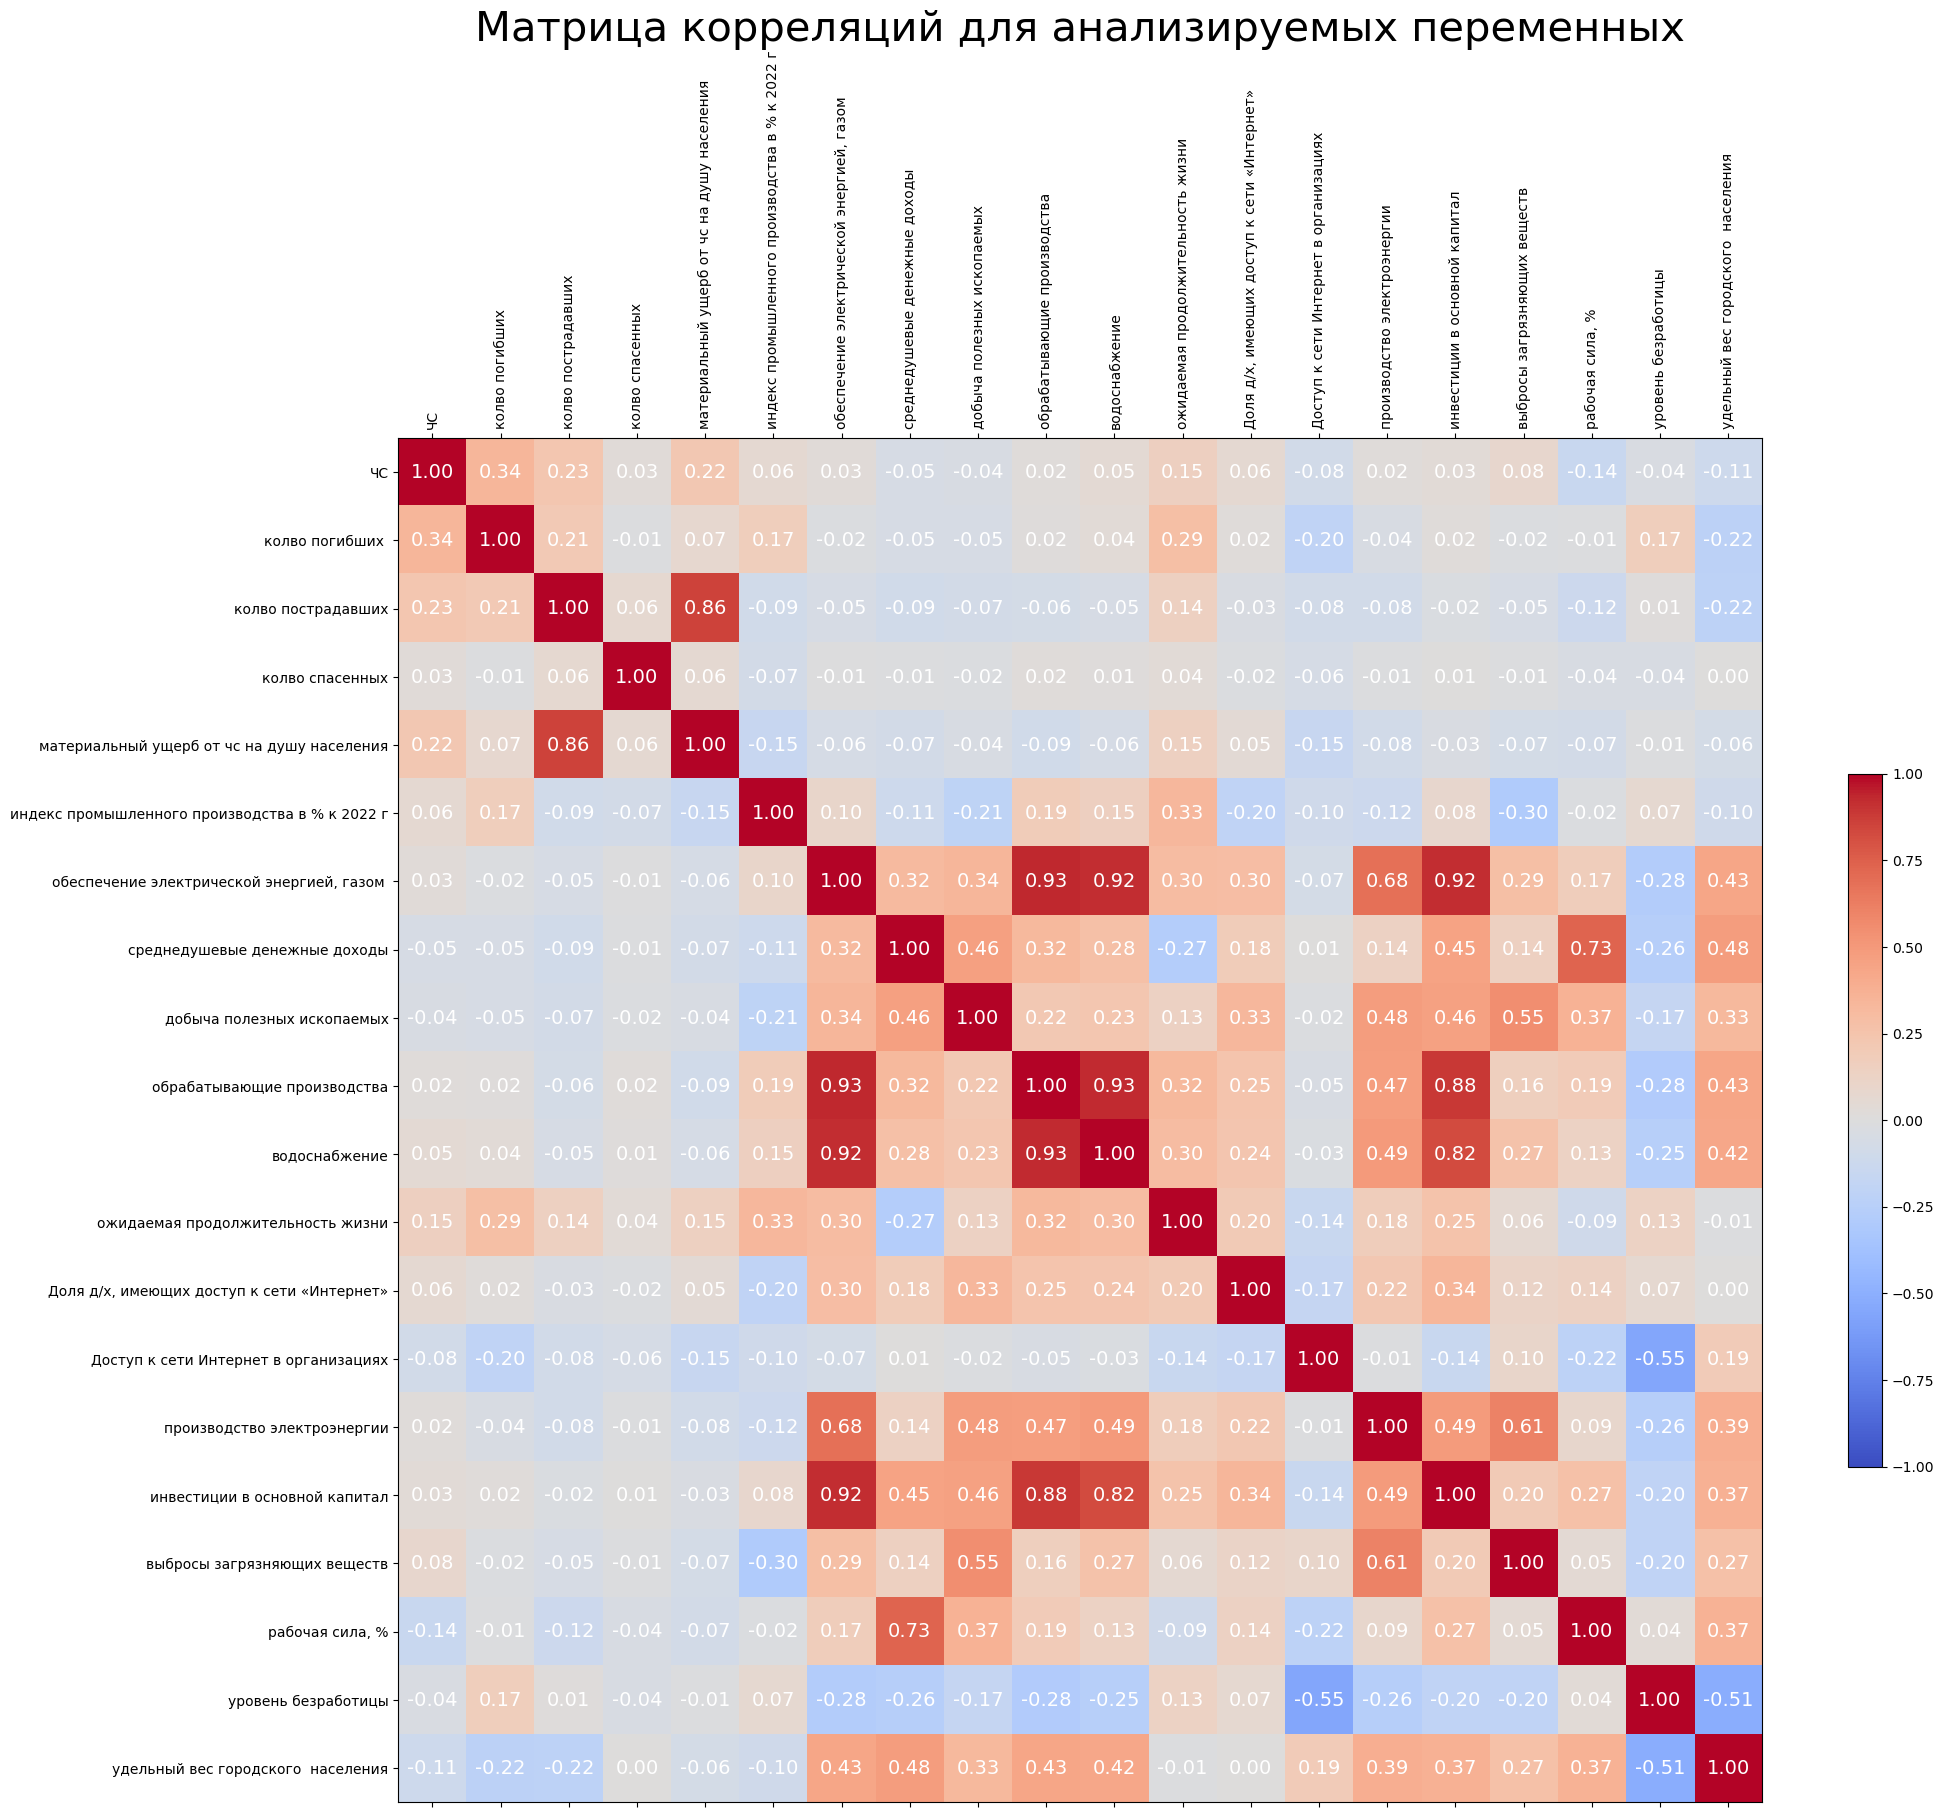

In [14]:
corr = df_scaled.corr()
f, ax = plt.subplots(figsize=(22, 18))
cmap = plt.cm.get_cmap('coolwarm')
im = ax.matshow(corr, cmap=cmap, vmax=1, vmin=-1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="w", fontsize=14)

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Матрица корреляций для анализируемых переменных', fontsize=30)
plt.colorbar(im, shrink=0.5)
plt.show()

In [15]:
from statsmodels.multivariate.factor import Factor
from factor_analyzer import FactorAnalyzer

In [16]:
df_sample = df[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения']]
df_sample.head()

,ЧС,колво погибших,колво пострадавших,колво спасенных,индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,добыча полезных ископаемых,обрабатывающие производства,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
0,2.0,0.0,0.0,0.0,98.1,30.5,32823.0,79.5,142.3,5.3,58.14,92.0,64.6,6.2,106119.0,107.0,56.3,7.4,59.1
1,3.0,3.0,14.0,0.0,100.8,81.3,57715.0,1619.4,43.4,9.3,60.30,88.3,73.1,10.3,616285.0,338.0,66.4,6.5,67.2
2,2.0,0.0,180.0,12.0,101.2,33.1,36183.0,243.0,37.4,5.0,55.88,77.6,73.8,7.6,182105.0,132.0,61.5,8.7,69.5
3,1.0,1.0,1.0,0.0,129.5,25.7,70769.0,30.5,155.7,4.2,58.71,87.8,73.3,2.0,90935.0,44.0,69.3,2.9,78.0
4,8.0,5.0,26790.0,1638.0,88.4,82.8,45834.0,32.2,284.4,13.1,58.30,86.8,75.1,11.9,327860.0,203.0,63.0,3.4,78.4


In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p_value = calculate_bartlett_sphericity(df_sample)
print(f"Chi²: {chi2}, p-value: {p_value}")

Chi²: 1098.4295517475523, p-value: 3.7601257011365243e-135


In [18]:
df_sample = (df_sample - df_sample.mean()) / df_sample.std()
df_sample.head()

,ЧС,колво погибших,колво пострадавших,колво спасенных,индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,добыча полезных ископаемых,обрабатывающие производства,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
0,-0.226110,-0.468450,-0.210643,-0.160869,-0.995827,-0.435428,-0.442353,-0.280025,-0.474981,-0.452132,0.135956,1.206654,-1.574337,-0.428553,-0.321861,-0.256065,-1.319637,0.733792,-0.910999
1,-0.085823,0.007465,-0.209771,-0.160869,-0.628573,0.018908,0.863998,1.499707,-0.547976,-0.342446,0.602266,0.649968,-0.253861,-0.198517,0.425429,0.366038,1.011450,0.474508,-0.285465
2,-0.226110,-0.468450,-0.199428,-0.127747,-0.574165,-0.412174,-0.266017,-0.091060,-0.552405,-0.460358,-0.351942,-0.959907,-0.145115,-0.350004,-0.210557,-0.188738,-0.119473,1.108314,-0.107844
3,-0.366397,-0.309812,-0.210581,-0.160869,3.275203,-0.478357,1.549081,-0.336656,-0.465091,-0.482295,0.259010,0.574741,-0.222791,-0.664199,-0.344103,-0.425730,1.680772,-0.562630,0.548580
4,0.615613,0.324742,1.458568,4.360292,-2.315222,0.032323,0.240474,-0.334692,-0.370102,-0.238244,0.170498,0.424285,0.056840,-0.108747,0.002944,0.002471,0.226728,-0.418583,0.579470


In [19]:
from sklearn.decomposition import PCA
# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(df_sample)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("-----------------------------------")
print("Shape of PCA DataFrame:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.343807  0.699392  0.876933  0.839237 -1.505067  0.921363 -0.904141   
1  0.616299 -0.498509  1.848394  0.731677 -0.102487 -0.364535  0.045084   
2 -1.252319 -0.417376  0.370223 -0.100870 -0.562032  0.065018  0.184099   
3 -0.048946 -0.217072  1.084020 -2.459257  0.911457 -1.318188  0.839252   
4 -0.002065 -0.432312  0.145136  1.704758  1.752636  4.082149  1.757664   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.083698 -0.466948 -0.221698  0.363440 -0.254900 -0.763801  0.526896   
1 -0.794266  0.414532 -0.102742 -0.305301  0.611530 -0.335713 -0.294582   
2  0.824673  0.064603 -0.078969  0.114398  0.817452 -0.275311 -0.347853   
3 -1.350352  0.504712 -1.215674 -0.713195 -1.378819  1.088039  0.954983   
4 -0.727437 -0.078859  0.482508  0.991844  0.278607  0.273136 -0.345456   

       PC15      PC16      PC17      PC18      PC19  
0  0.310896 -0.673265  0.240874  0.041165  0

In [20]:
corr_matrix = df_sample.corr()
corr_matrix

,ЧС,колво погибших,колво пострадавших,колво спасенных,индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,добыча полезных ископаемых,обрабатывающие производства,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
ЧС,1.000000,0.337122,0.232819,0.028213,0.060380,0.026066,-0.054652,-0.043540,0.019767,0.052927,0.148619,0.055717,-0.083302,0.021956,0.033757,0.080498,-0.142626,-0.035053,-0.111643
колво погибших,0.337122,1.000000,0.205334,-0.013208,0.171850,-0.017597,-0.053297,-0.051314,0.015247,0.037419,0.288242,0.019441,-0.201370,-0.044079,0.015759,-0.017810,-0.010823,0.168454,-0.222651
колво пострадавших,0.232819,0.205334,1.000000,0.063652,-0.090530,-0.046969,-0.087435,-0.072871,-0.064528,-0.053050,0.141007,-0.031676,-0.083510,-0.078427,-0.024400,-0.049904,-0.118088,0.008016,-0.216620
колво спасенных,0.028213,-0.013208,0.063652,1.000000,-0.072204,-0.006338,-0.010217,-0.020757,0.018365,0.009077,0.035604,-0.020526,-0.055136,-0.008261,0.007182,-0.008910,-0.043819,-0.043915,0.002542
индекс промышленного производства в % к 2022 г,0.060380,0.171850,-0.090530,-0.072204,1.000000,0.096126,-0.113459,-0.205195,0.186368,0.153738,0.328795,-0.196947,-0.096840,-0.122497,0.082615,-0.295561,-0.022978,0.065985,-0.100147
"обеспечение электрической энергией, газом",0.026066,-0.017597,-0.046969,-0.006338,0.096126,1.000000,0.318738,0.342328,0.933314,0.916430,0.299691,0.295189,-0.065436,0.680636,0.918950,0.288994,0.174305,-0.280343,0.433821
среднедушевые денежные доходы,-0.054652,-0.053297,-0.087435,-0.010217,-0.113459,0.318738,1.000000,0.461812,0.321395,0.275248,-0.266873,0.182213,0.007226,0.139923,0.448252,0.143876,0.733444,-0.263228,0.482777
добыча полезных ископаемых,-0.043540,-0.051314,-0.072871,-0.020757,-0.205195,0.342328,0.461812,1.000000,0.216320,0.234077,0.133913,0.333064,-0.015698,0.480245,0.458864,0.552401,0.365779,-0.169016,0.327996
обрабатывающие производства,0.019767,0.015247,-0.064528,0.018365,0.186368,0.933314,0.321395,0.216320,1.000000,0.925689,0.323461,0.247077,-0.045909,0.473608,0.884841,0.162846,0.191259,-0.283078,0.432579
водоснабжение,0.052927,0.037419,-0.053050,0.009077,0.153738,0.916430,0.275248,0.234077,0.925689,1.000000,0.297842,0.235686,-0.025429,0.494085,0.823749,0.265209,0.130401,-0.254610,0.424568


In [21]:
# calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
num_cols = [col for col in df_sample.columns if df_sample[col].dtype in ['int64','float64']]
# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=df_sample[num_cols].columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

# display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

Eigenvalues:


,Eigenvalue,Proportion,Cumulative Proportion
ЧС,5.3402,0.2811,0.2811
колво погибших,2.4619,0.1296,0.4106
колво пострадавших,1.8370,0.0967,0.5073
колво спасенных,1.6705,0.0879,0.5952
индекс промышленного производства в % к 2022 г,1.2841,0.0676,0.6628
"обеспечение электрической энергией, газом",1.0807,0.0569,0.7197
среднедушевые денежные доходы,0.9530,0.0502,0.7699
добыча полезных ископаемых,0.8178,0.0430,0.8129
обрабатывающие производства,0.7882,0.0415,0.8544
водоснабжение,0.6102,0.0321,0.8865


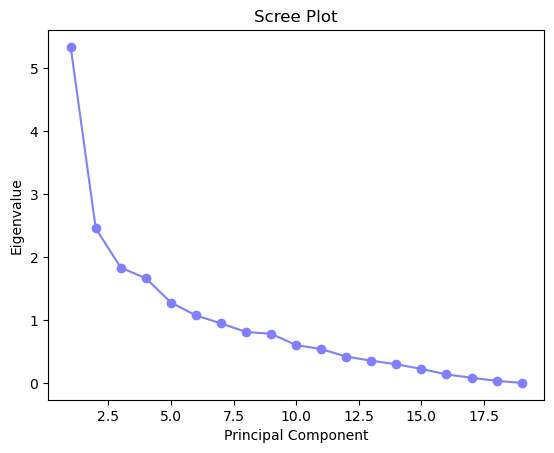

In [22]:
# plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

[0.28106535 0.1295746  0.09668294 0.08792296 0.06758426 0.05687862
 0.05015846 0.04303957 0.04148525 0.03211616 0.02870493 0.02247406
 0.01903653 0.01603975 0.01216707 0.00756935 0.00479354 0.00223728
 0.00046929]


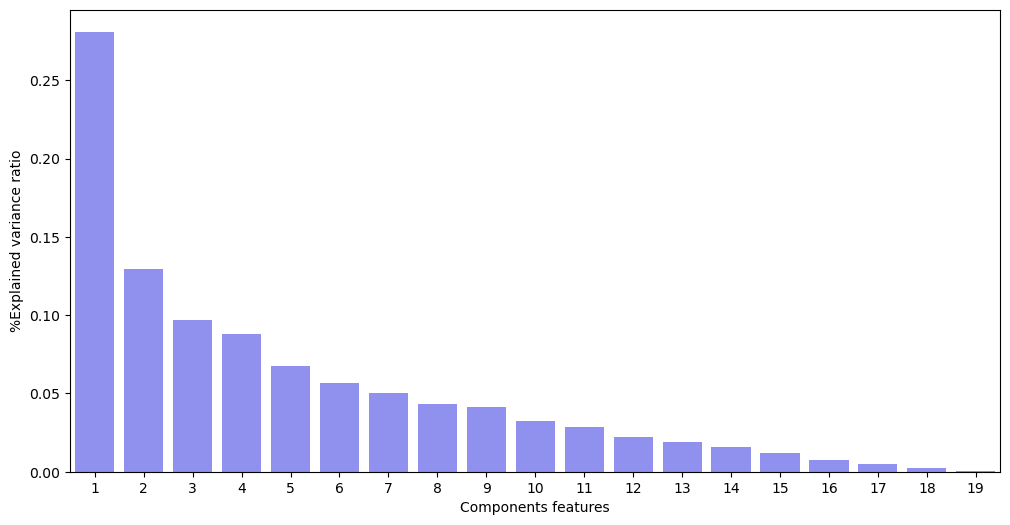

In [23]:
evr = pca.explained_variance_ratio_
print(evr)
features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# plot the EVR using matplotlib pyplot    
plt.figure(figsize=(12,6))
sns.barplot(x=np.array(features), y=evr, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show()

[ 5.34024167  7.80215916  9.63913498 11.30967127 12.59377221 13.67446607
 14.62747686 15.44522869 16.23344847 16.84365551 17.38904927 17.81605648
 18.17775056 18.48250585 18.71368011 18.85749778 18.94857503 18.99108343
 19.        ]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

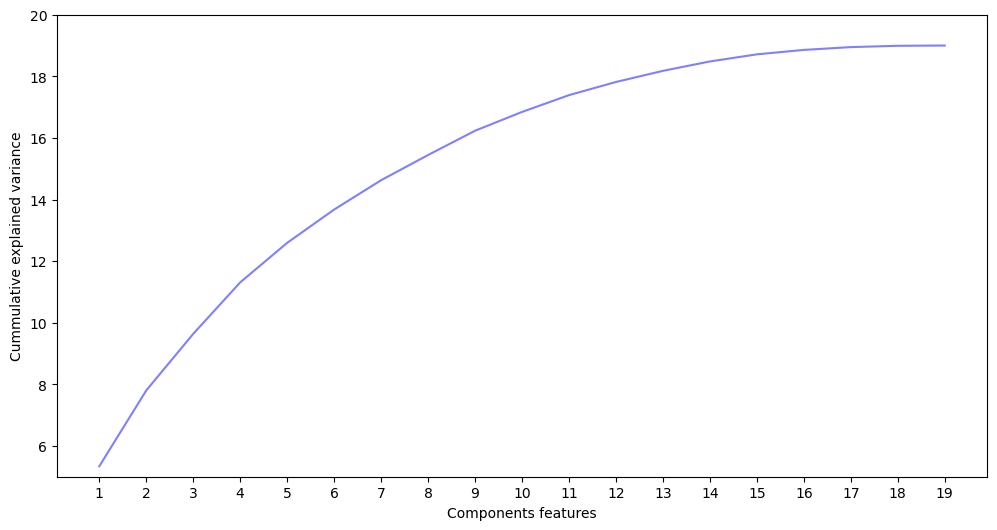

In [24]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

plt.figure(figsize=(12,6))
sns.lineplot(x=np.array(features), y=evc, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(5,20)
plt.show

In [25]:
features1 = ['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 
             'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 
             'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 
             'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 
             'удельный вес городского  населения']

In [26]:
loadings = pd.DataFrame(pca.components_.T[:,:4], index=np.array(features1), columns=names[:4])
loadings

,PC1,PC2,PC3,PC4
ЧС,0.002005,0.240219,-0.050022,0.267115
колво погибших,-0.020256,0.342257,0.124793,0.137841
колво пострадавших,-0.049703,0.190842,-0.009459,0.241854
колво спасенных,-0.000528,0.020362,-0.032800,0.062819
индекс промышленного производства в % к 2022 г,-0.002595,0.309913,-0.109952,-0.418102
"обеспечение электрической энергией, газом",0.400902,0.151242,-0.099992,-0.066257
среднедушевые денежные доходы,0.232087,-0.279946,0.333594,-0.178795
добыча полезных ископаемых,0.251264,-0.167962,0.237491,0.310744
обрабатывающие производства,0.376130,0.180815,-0.116733,-0.199307
водоснабжение,0.369962,0.178494,-0.140593,-0.125837


## Axis Rotation : Varimax Orthogonal

In [27]:
X_norm = df_sample

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=4, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(4)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.56].dropna(how='all')

# display the results
rotated_factor_pattern

,Factor1,Factor2,Factor3,Factor4
индекс промышленного производства в % к 2022 г,NaN,NaN,NaN,-0.656469
"обеспечение электрической энергией, газом",0.951798,NaN,NaN,NaN
среднедушевые денежные доходы,NaN,0.726502,NaN,NaN
добыча полезных ископаемых,NaN,NaN,NaN,0.745340
обрабатывающие производства,0.958964,NaN,NaN,NaN
водоснабжение,0.930390,NaN,NaN,NaN
Доступ к сети Интернет в организациях,NaN,NaN,-0.793104,NaN
производство электроэнергии,NaN,NaN,NaN,0.563862
инвестиции в основной капитал,0.889620,NaN,NaN,NaN
выбросы загрязняющих веществ,NaN,NaN,NaN,0.765344


## Linear Regression

In [28]:
# obtain the factor scores
factor_scores = fa.transform(X_norm)

# convert to dataframe
factor_scores_df = pd.DataFrame(factor_scores, columns=['Промышленность и инфраструктура', 'Экономическое благополучие и занятость',
                                                        'Технологии и занятость', 'Экология, добыча и промышленность'])

# add the factor scores as new columns to your original dataframe
df_with_factor_scores = pd.concat([df_scaled, factor_scores_df], axis=1)
df_with_factor_scores = df_with_factor_scores.dropna()

# perform regression analysis using the factor scores as predictors
import statsmodels.api as sm

X1 = df_with_factor_scores[['Промышленность и инфраструктура', 'Экономическое благополучие и занятость',
                                                        'Технологии и занятость', 'Экология, добыча и промышленность']] # use the factor scores as predictors
Y1 = df_with_factor_scores['материальный ущерб от чс на душу населения'] # your dependent variable

X1 = sm.add_constant(X1) # add a constant to your predictor variables
model = sm.OLS(Y1, X1).fit() # fit the regression model
print(model.summary()) # print the summary of the model

                                        OLS Regression Results                                        
Dep. Variable:     материальный ущерб от чс на душу населения   R-squared:                       0.133
Model:                                                    OLS   Adj. R-squared:                  0.090
Method:                                         Least Squares   F-statistic:                     3.076
Date:                                        Wed, 14 May 2025   Prob (F-statistic):             0.0207
Time:                                                12:41:20   Log-Likelihood:                -114.53
No. Observations:                                          85   AIC:                             239.1
Df Residuals:                                              80   BIC:                             251.3
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

C:\Users\yuliy\AppData\Local\Temp\ipykernel_18812\2364275788.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


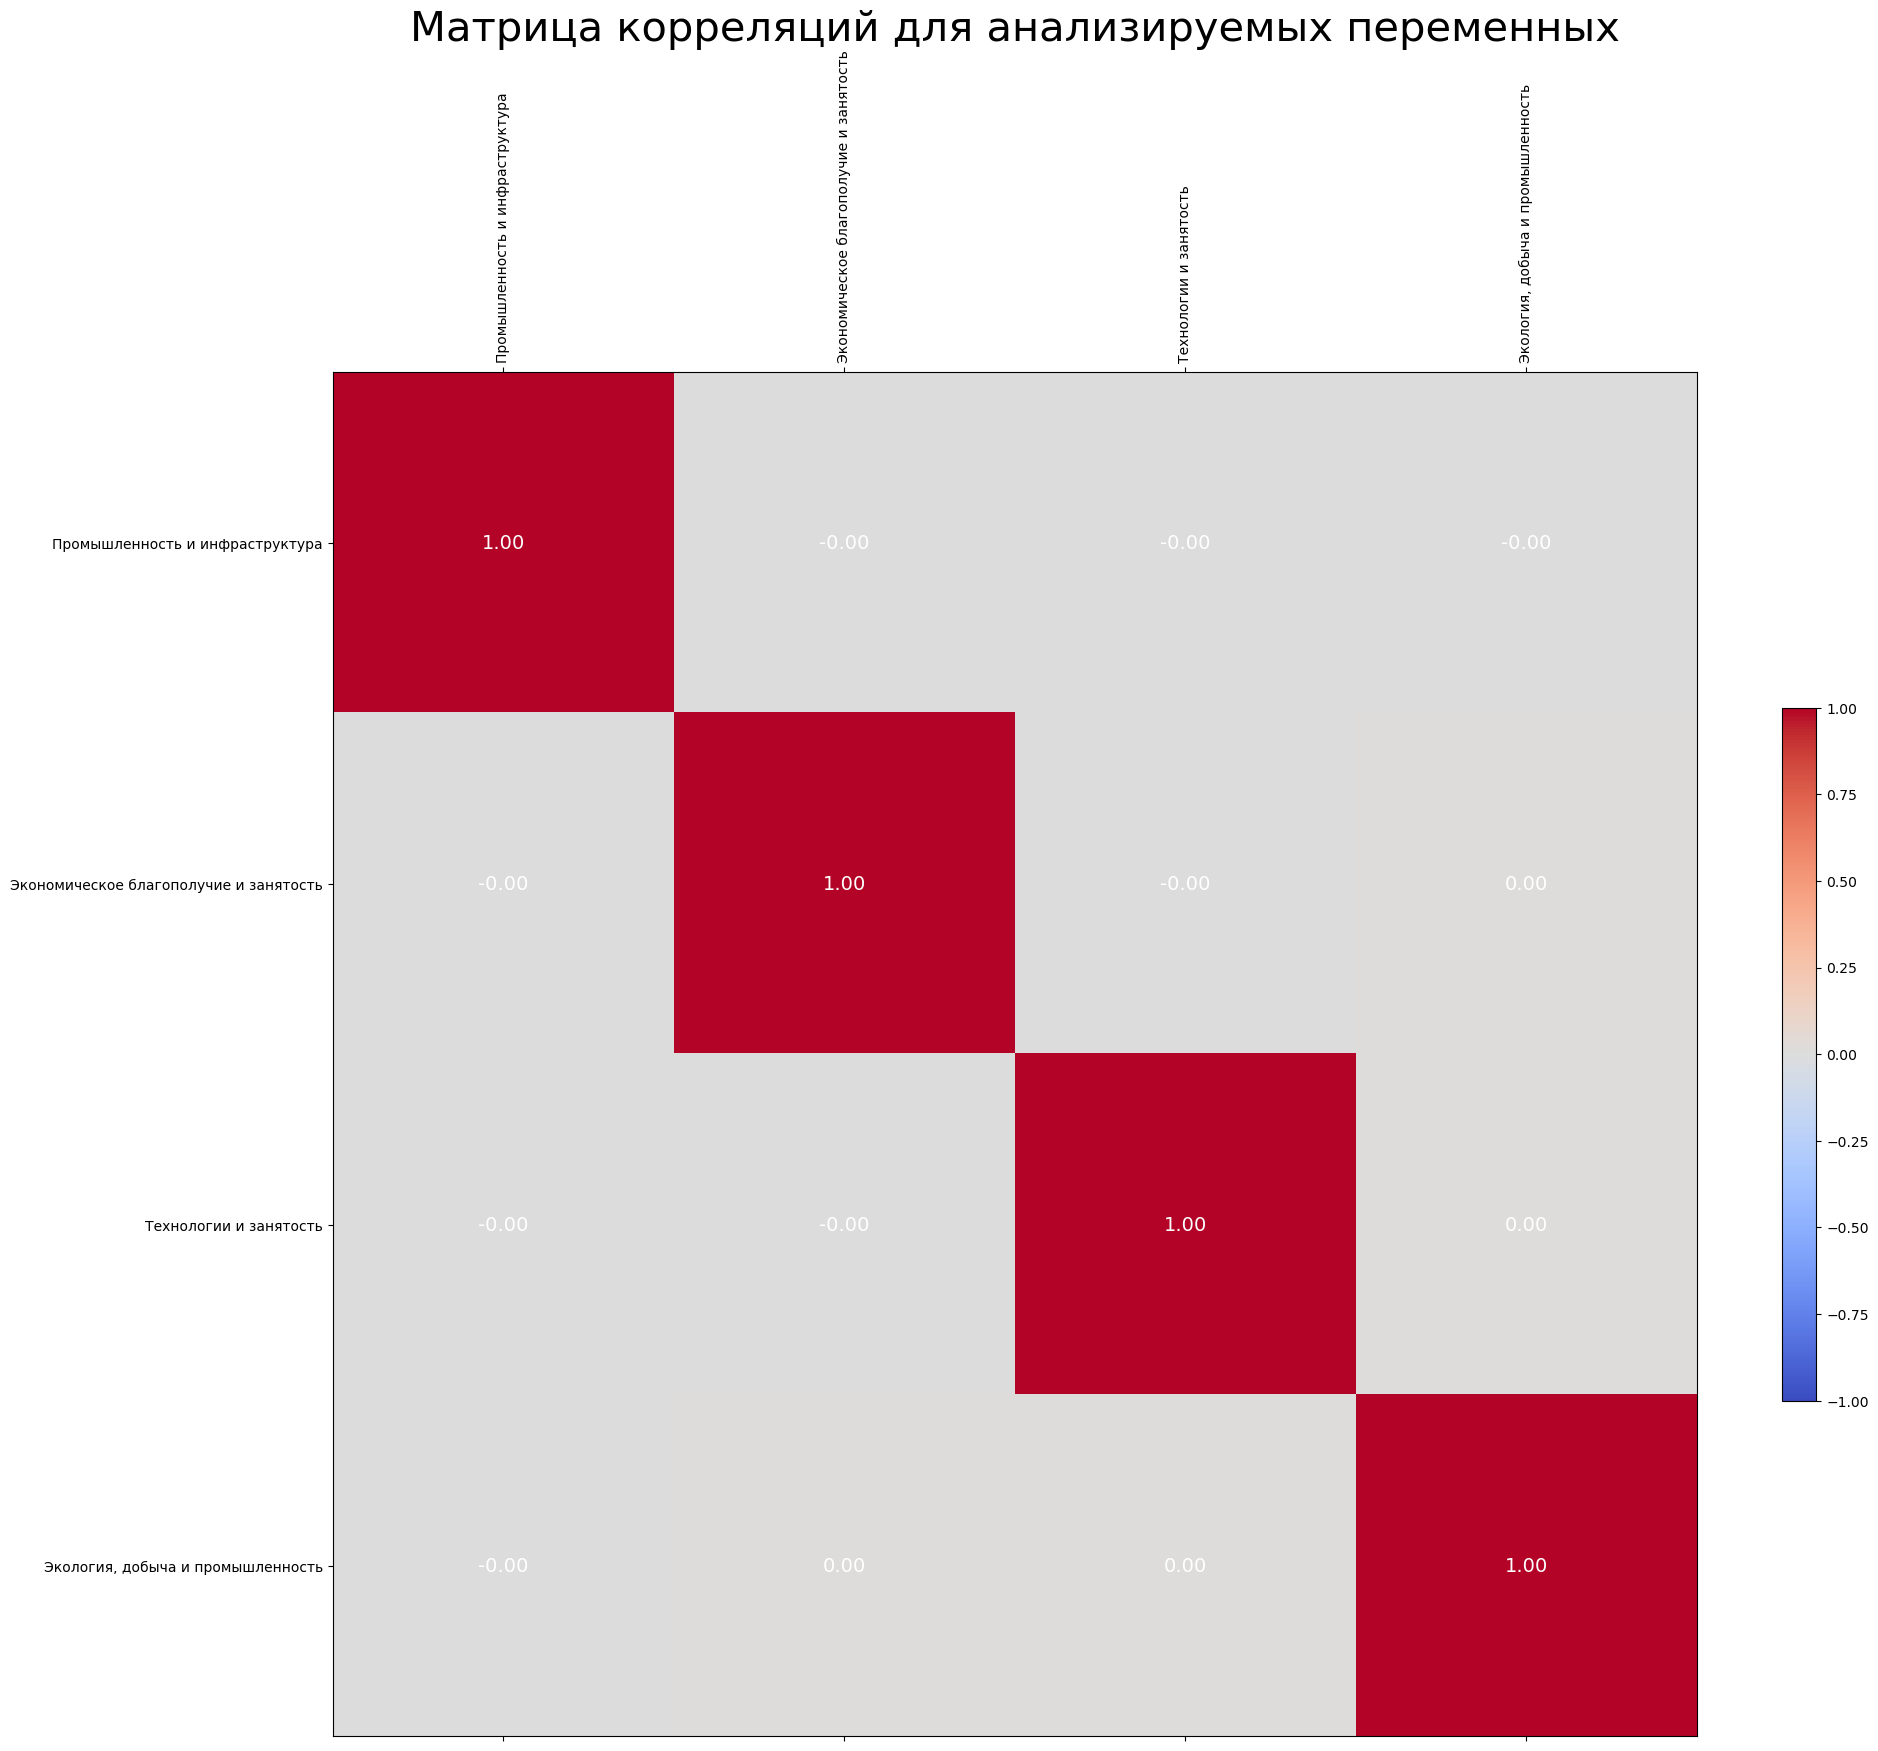

In [29]:
corr = factor_scores_df.corr()
f, ax = plt.subplots(figsize=(22, 18))
cmap = plt.cm.get_cmap('coolwarm')
im = ax.matshow(corr, cmap=cmap, vmax=1, vmin=-1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="w", fontsize=14)

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Матрица корреляций для анализируемых переменных', fontsize=30)
plt.colorbar(im, shrink=0.5)
plt.show()

## Регрессия

In [30]:
from scipy.stats import norm

In [31]:
# Параметры нормального распределения (среднее и стандартное отклонение)
mu = 0  # среднее значение (предположим)
sigma = 1  # стандартное отклонение

# Генерация данных
np.random.seed(0)
data = np.random.normal(mu, sigma, 1000)

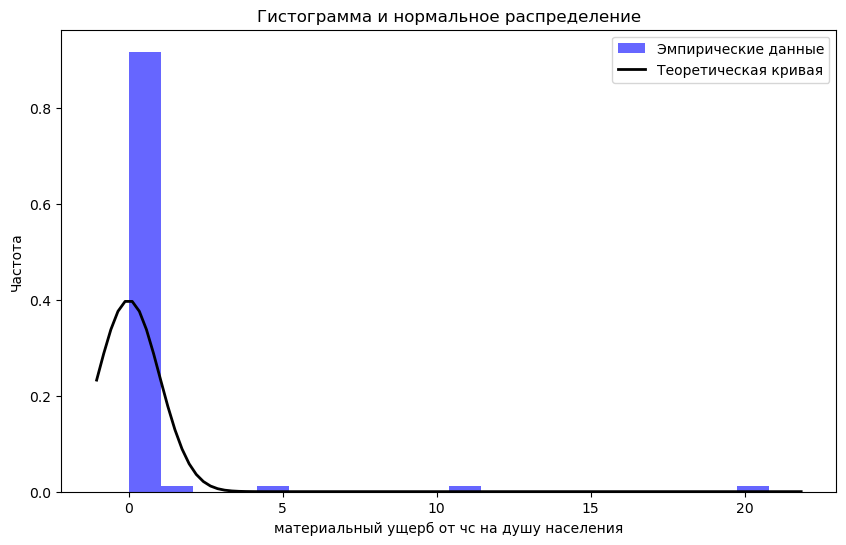

In [32]:
plt.figure(figsize=(10, 6))

# Гистограмма
plt.hist(df1['материальный ущерб от чс на душу населения'], bins=20, density=True, alpha=0.6, color='blue', label='Эмпирические данные')

# Теоретическая нормальная кривая
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Теоретическая кривая')

# Настройки графика
plt.xlabel('материальный ущерб от чс на душу населения')
plt.ylabel('Частота')
plt.title('Гистограмма и нормальное распределение')
plt.legend()
plt.show()

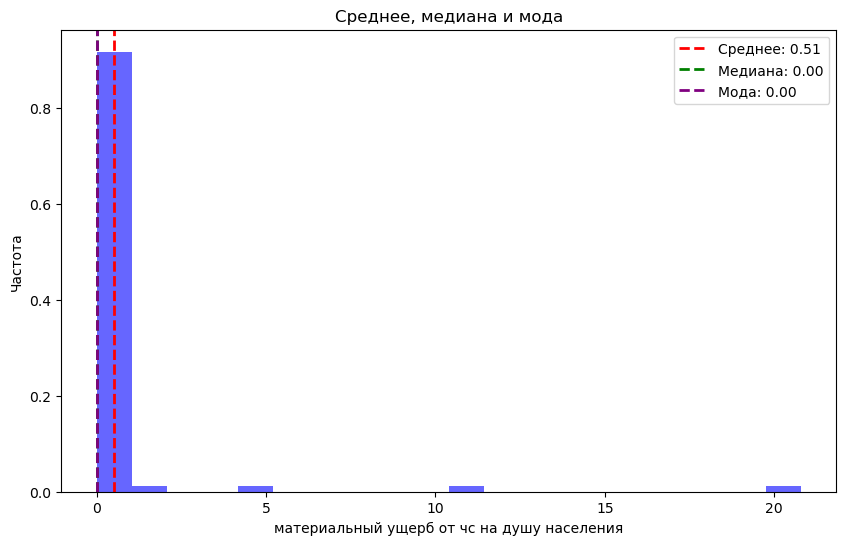

In [33]:
plt.figure(figsize=(10, 6))

# Гистограмма
plt.hist(df1['материальный ущерб от чс на душу населения'], bins=20, density=True, alpha=0.6, color='blue')

# Среднее, медиана, мода
mean = np.mean(df1['материальный ущерб от чс на душу населения'])
median = np.median(df1['материальный ущерб от чс на душу населения'])
values, counts = np.unique(df1['материальный ущерб от чс на душу населения'], return_counts=True)
mode = values[np.argmax(counts)]

# Вертикальные линии
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Мода: {mode:.2f}')

# Настройки
plt.xlabel('материальный ущерб от чс на душу населения')
plt.ylabel('Частота')
plt.title('Среднее, медиана и мода')
plt.legend()
plt.show()

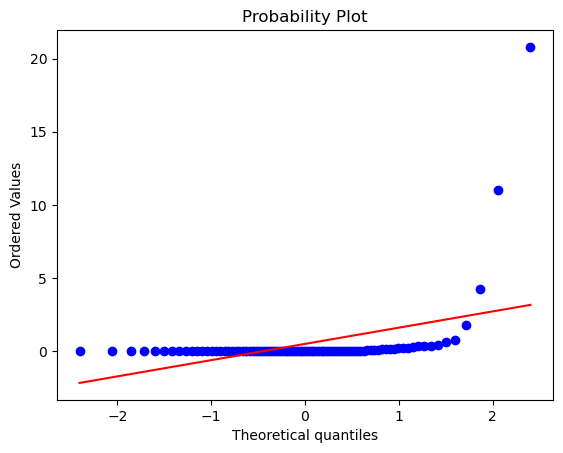

In [34]:
import scipy.stats as stats
stats.probplot(df1['материальный ущерб от чс на душу населения'], dist="norm", plot=plt)
plt.show()

In [35]:
from scipy.stats import skew, kurtosis
skewness = skew(df1['материальный ущерб от чс на душу населения'])
kurt = kurtosis(df1['материальный ущерб от чс на душу населения'])
skewness, kurt

(6.732991896371847, 47.088185915924605)

<Axes: title={'center': 'Boxplot для визуализации выбросов по материальному ущербу от ЧС на душу населения'}, xlabel='Переменная', ylabel='Значение'>

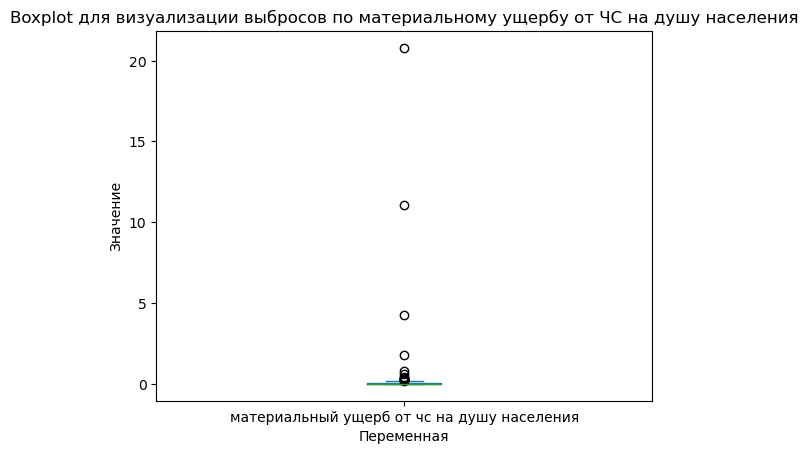

In [36]:
df1['материальный ущерб от чс на душу населения'].plot(kind = 'box', vert = True, title = 'Boxplot для визуализации выбросов по материальному ущербу от ЧС на душу населения', ylabel = 'Значение', xlabel = 'Переменная', fontsize = 10) #ящик с усами для визуализации выбросов

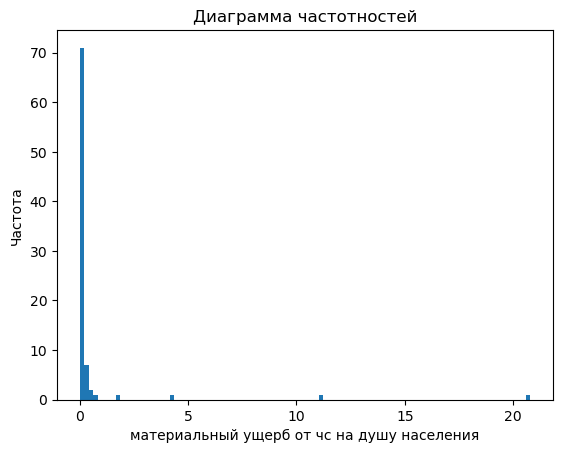

In [37]:
df1['материальный ущерб от чс на душу населения'].plot(kind='hist', bins=100) #гистограмма для визуализации выбросов по методу IQR 

plt.title("Диаграмма частотностей")
plt.xlabel("материальный ущерб от чс на душу населения")
plt.ylabel("Частота")

plt.show()

**предпосылки для тобит модели**

1. проверим на мультиколлинеарность -> еще раз посмотрим на корреляционную матрицу

считаем VIF

In [38]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
X_vif = df1[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения']]
X_const = add_constant(X_vif)

# Расчет VIF для каждого предиктора
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Вывод результатов
print(vif_data)

                                          Variable          VIF
0                                            const  1706.117321
1                                               ЧС     1.271663
2                                  колво погибших      1.456197
3                               колво пострадавших     1.262974
4                                  колво спасенных     1.062949
5   индекс промышленного производства в % к 2022 г     1.609959
6       обеспечение электрической энергией, газом     76.905107
7                    среднедушевые денежные доходы     4.396457
8                       добыча полезных ископаемых     4.297957
9                      обрабатывающие производства    16.758935
10                                   водоснабжение    15.431402
11               ожидаемая продолжительность жизни     2.309125
12      Доля д/х, имеющих доступ к сети «Интернет»     1.448167
13           Доступ к сети Интернет в организациях     1.822223
14                     производство элек

C:\Users\yuliy\AppData\Local\Temp\ipykernel_18812\1606715264.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


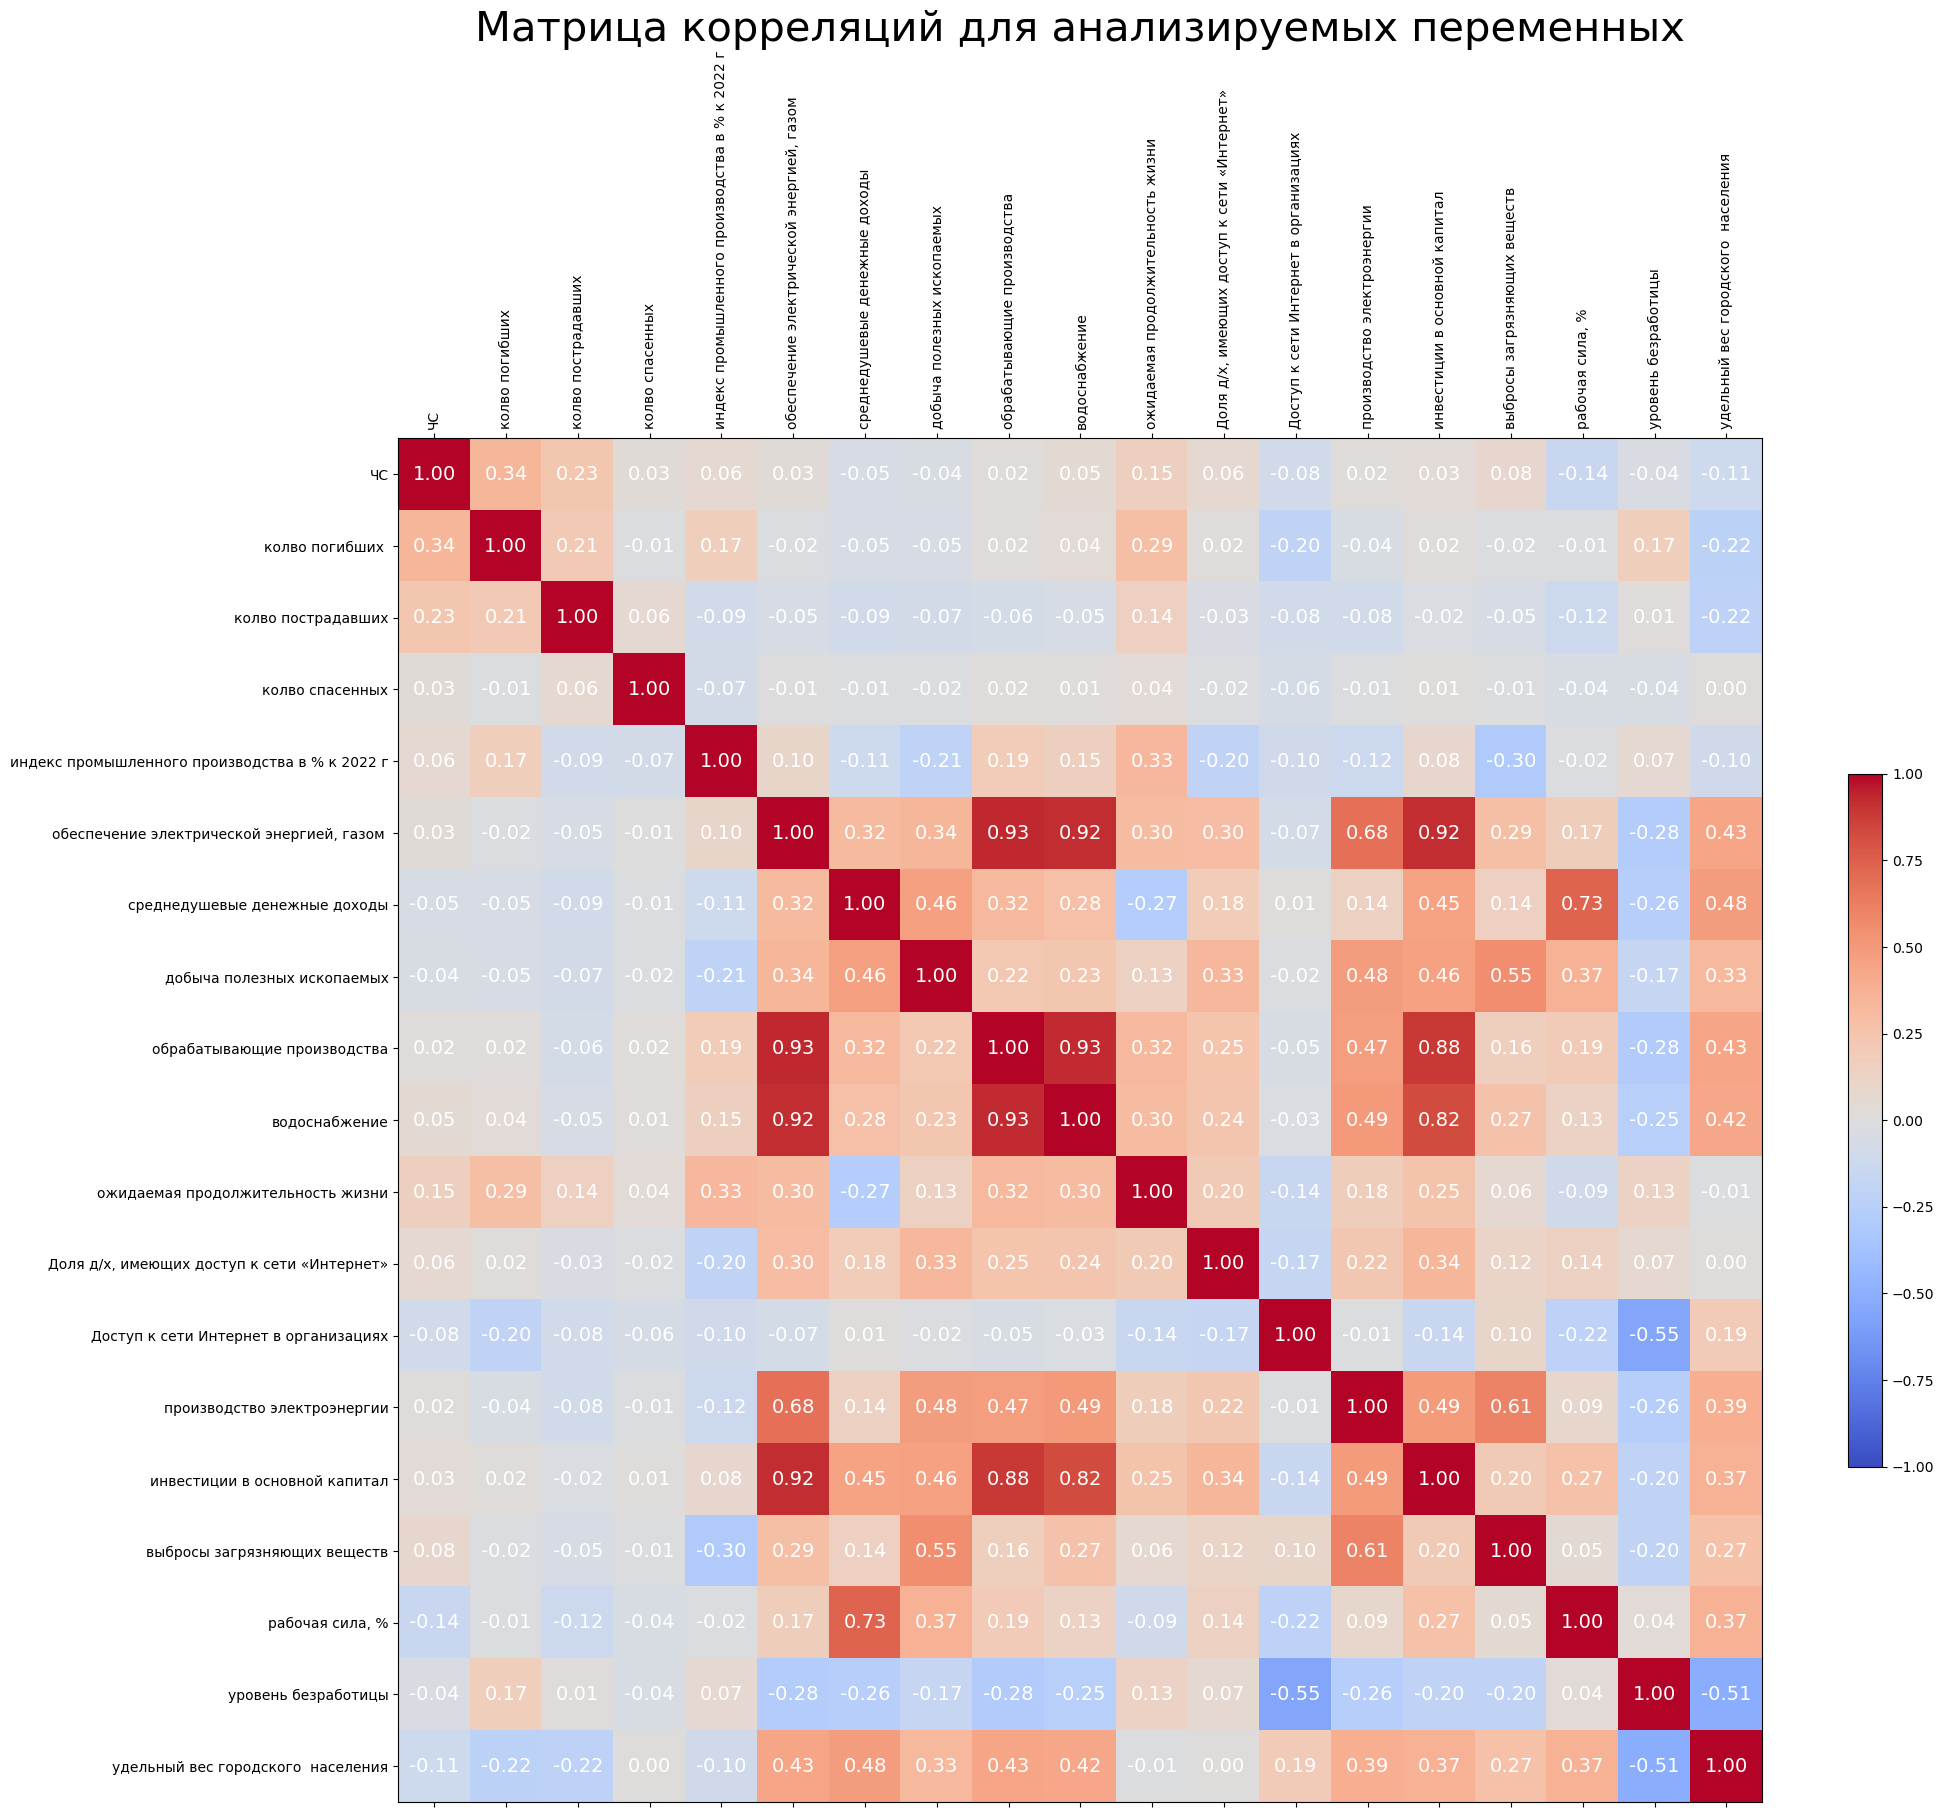

In [40]:
corr = X_vif.corr()
f, ax = plt.subplots(figsize=(22, 18))
cmap = plt.cm.get_cmap('coolwarm')
im = ax.matshow(corr, cmap=cmap, vmax=1, vmin=-1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="w", fontsize=14)

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Матрица корреляций для анализируемых переменных', fontsize=30)
plt.colorbar(im, shrink=0.5)
plt.show()

VIF < 5 — мультиколлинеарности нет.

5 ≤ VIF < 10 — умеренная мультиколлинеарность.

VIF ≥ 10 — критический уровень.

убираем сильные корреляции: обеспечение электрической энергией и газом, обрабатывающие производства, водоснабжение, среднедушевые доходы

In [41]:
X_vif1 = df1[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 'добыча полезных ископаемых', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ','рабочая сила, %', 'уровень безработицы', 'удельный вес городского  населения']]
X_const1 = add_constant(X_vif1)

# Расчет VIF для каждого предиктора
vif_data1 = pd.DataFrame()
vif_data1["Variable"] = X_const1.columns
vif_data1["VIF"] = [variance_inflation_factor(X_const1.values, i) for i in range(X_const1.shape[1])]

# Вывод результатов
print(vif_data1)

                                          Variable          VIF
0                                            const  1428.123390
1                                               ЧС     1.240372
2                                  колво погибших      1.324106
3                               колво пострадавших     1.237127
4                                  колво спасенных     1.035205
5   индекс промышленного производства в % к 2022 г     1.550609
6                       добыча полезных ископаемых     2.151519
7                ожидаемая продолжительность жизни     1.573837
8       Доля д/х, имеющих доступ к сети «Интернет»     1.414052
9            Доступ к сети Интернет в организациях     1.772683
10                     производство электроэнергии     2.203175
11                   инвестиции в основной капитал     1.899482
12                    выбросы загрязняющих веществ     2.211400
13                                 рабочая сила, %     1.638328
14                             уровень б

C:\Users\yuliy\AppData\Local\Temp\ipykernel_18812\2064036911.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


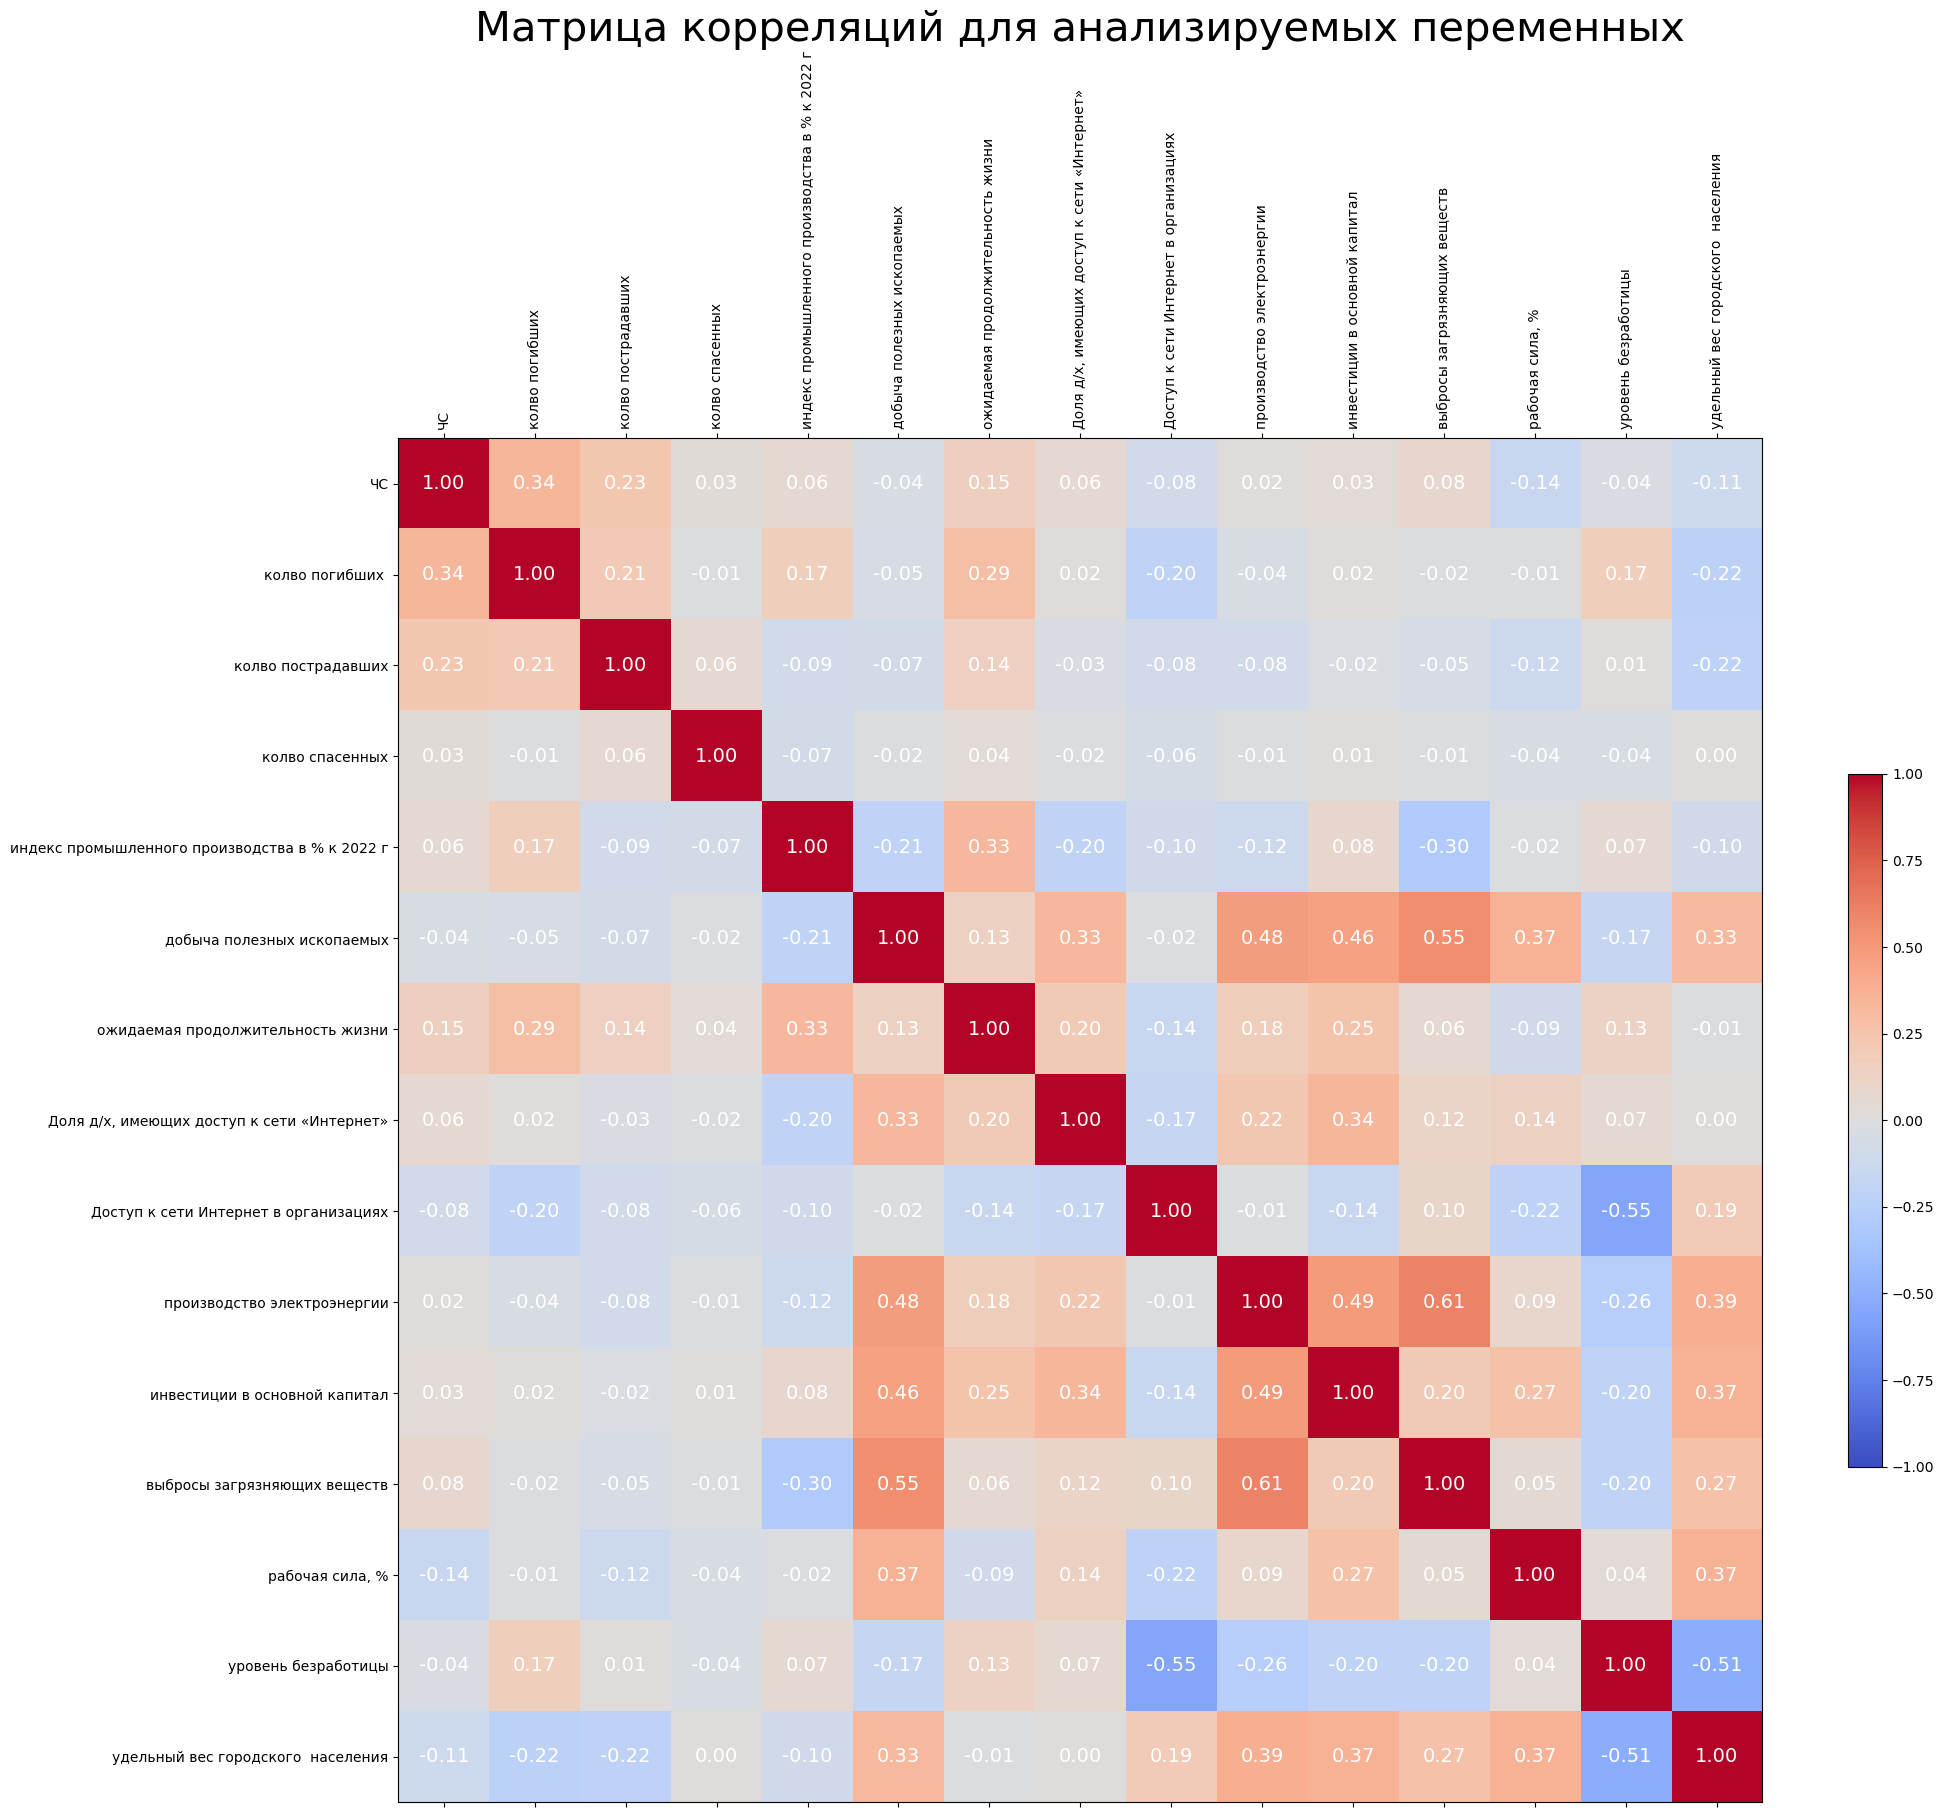

In [42]:
corr = X_vif1.corr()
f, ax = plt.subplots(figsize=(22, 18))
cmap = plt.cm.get_cmap('coolwarm')
im = ax.matshow(corr, cmap=cmap, vmax=1, vmin=-1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="w", fontsize=14)

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Матрица корреляций для анализируемых переменных', fontsize=30)
plt.colorbar(im, shrink=0.5)
plt.show()

все норм, все лишнее убрали

дерево решений + случайный лес

In [43]:
from sklearn.naive_bayes import CategoricalNB             # наивный байесовский классификатор
from sklearn.model_selection import train_test_split      # разделение выборки на
                                                          # обучающую и тестовую
from sklearn.model_selection import cross_val_score       # кросс-валидация
from sklearn.model_selection import KFold                 # разбиение на фолды
import openpyxl                                           # работа с excel
import matplotlib.pyplot as plt                           # графики
from sklearn.metrics import confusion_matrix              # подсчет прогнозов
from sklearn.neighbors import KNeighborsClassifier        # метод ближайшие соседей
import sklearn
from sklearn.model_selection import GridSearchCV          # подбор гиперпараметров
from sklearn.model_selection import RandomizedSearchCV    # подбор гиперпараметров
import scipy                                              # распределения
from sklearn.metrics import RocCurveDisplay               # ROC-кривая
from sklearn import metrics                               # метрики точности
import itertools
from sklearn.ensemble import RandomForestClassifier       # случайный лес (классификация)
from sklearn.ensemble import RandomForestRegressor        # случайный лес (регрессия)
from sklearn import tree                                  # решающие деревья
from sklearn.inspection import permutation_importance     # перестановочная важность
from scipy.stats import rankdata                          # ранжирование элементов
from sklearn.ensemble import BaggingClassifier            # бэггинг
from copy import deepcopy                                 # копирование объектов
from sklearn.linear_model import LinearRegression         # копирование объектов

In [44]:
n = df1.index.size

In [45]:
# Шаг 1: Классификация наличия ущерба
df1['ущерб_есть'] = (df1['материальный ущерб от чс на душу населения'] > 0).astype(float)
features = df1[['колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 
         'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 
         'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 
         'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 
         'уровень безработицы', 'удельный вес городского  населения']]
target = df1['ущерб_есть']
target   = np.squeeze(target)                              # преобразуем из вектора столбца
                                                           # в одномерный массив

C:\Users\yuliy\AppData\Local\Temp\ipykernel_18812\744970190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ущерб_есть'] = (df1['материальный ущерб от чс на душу населения'] > 0).astype(float)


In [46]:
# Разделим выборку на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.2, random_state = 777)

# Сохраним число наблюдений обучающей и тестовой выборок
n_train = len(target_train)
n_test  = len(target_test)

# Вернем исходную сортировку индексов
features_train = features_train.reset_index(drop = True)
target_train   = target_train.reset_index(drop = True)
features_test  = features_test.reset_index(drop = True)
target_test    = target_test.reset_index(drop = True)

In [47]:
# Обучим решающее дерево
dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

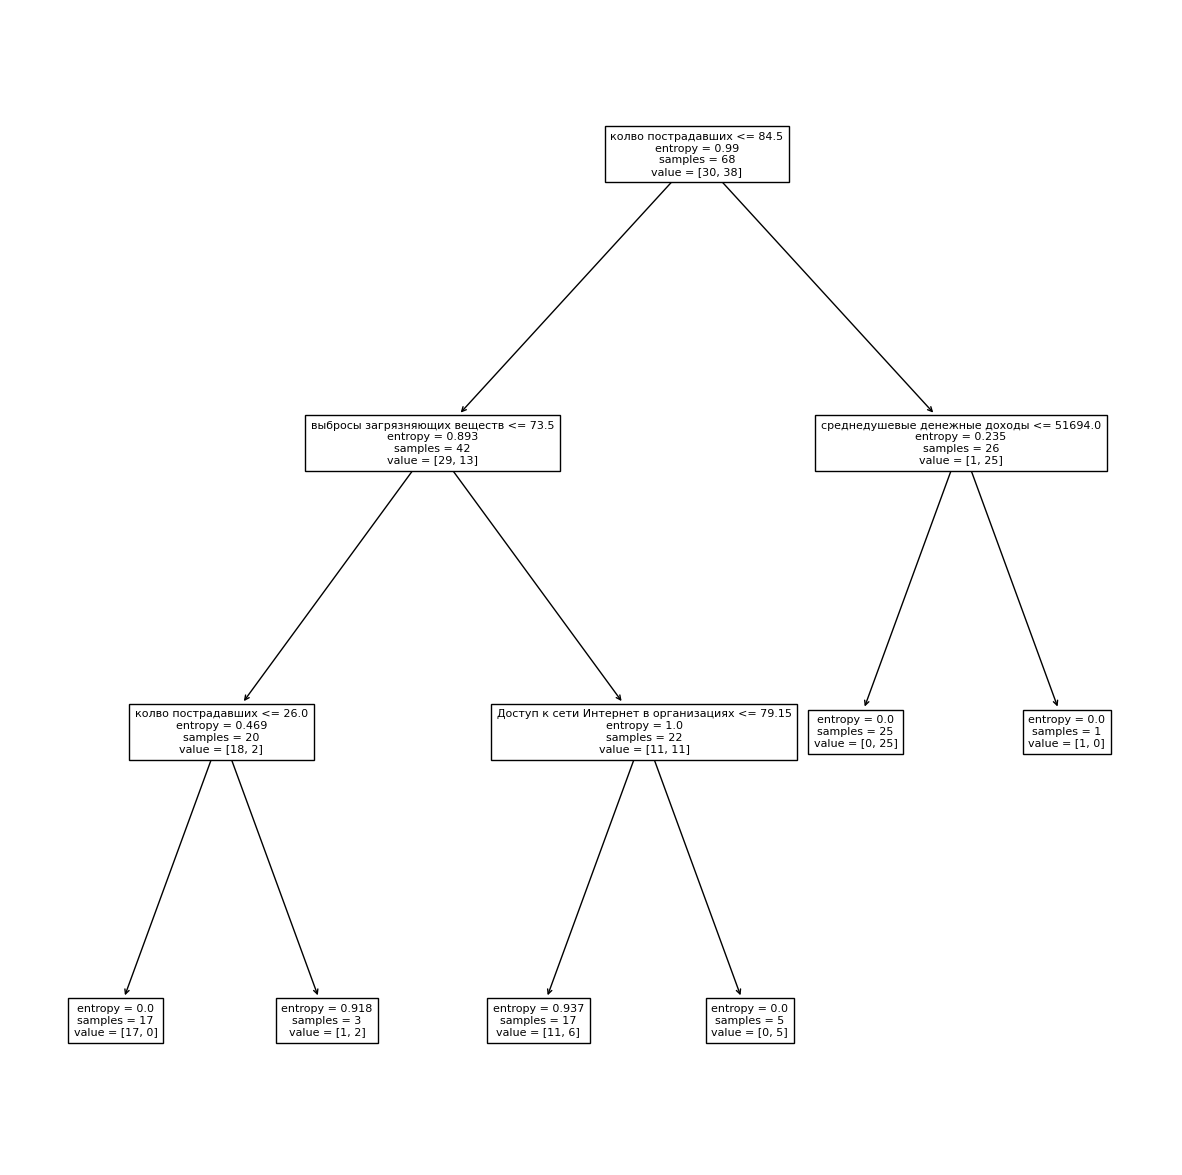

In [48]:
# Визуализируем полученный результат
plt.figure(figsize=(15, 15))
tree.plot_tree(dt, feature_names = features_train.columns, fontsize = 8)
plt.show()

Дерево решений можно интерпретировать следующим образом:

Корневой узел:

Условие: количество пострадавших ≤ 84.5.

Энтропия (0.99) показывает высокую неопределенность.

Из 68 образцов 30 относятся к классу 1, 38 — к классу 2.

Первое разделение:

Если выбросы загрязняющих веществ ≤ 73.5, данные переходят в узел с 42 образцами (29 класса 1, 13 класса 2).

Далее проверяется среднедушевой доход ≤ 51694. В этом узле преобладает класс 2 (25 против 1).

Ветвление по количеству пострадавших:

Если количество пострадавших ≤ 26, в узле 20 образцов (18 класса 1, 2 класса 2).

Если доступ к интернету ≤ 79.15, данные разделяются поровну (11 класса 1 и 11 класса 2) с максимальной энтропией (1.0).

Листовые узлы:

Некоторые узлы имеют нулевую энтропию, что указывает на чистые классы. Например:

25 образцов: все относятся к классу 2.

37 образцов: 11 класса 1, 6 класса 2.

Вывод:
Дерево показывает, что ключевыми признаками для классификации являются количество пострадавших, выбросы загрязняющих веществ, доходы населения и доступ к интернету. Например:

При низких выбросах (≤73.5) и высоких доходах (>51694) преобладает класс 2.

При малом количестве пострадавших (≤26) доминирует класс 1.


In [49]:
# Оцениваем условные вероятности
prob_dt = dt.predict_proba(features_train)
print(prob_dt[0:10:, 0])                   # оценки P(Y = 0 | X = x)
print(prob_dt[0:10:, 1])                   # оценки P(Y = 1 | X = x)

[0.         0.         0.         1.         1.         0.64705882
 0.         0.         1.         0.        ]
[1.         1.         1.         0.         0.         0.35294118
 1.         1.         0.         1.        ]


In [50]:
# Прогнозы
prediction_dt = dt.predict(features_train)       # I(P(Y = 1 | X = x) > 0.5)

In [51]:
# Оценим точность на обучающей выборке
ACC_train_dt = dt.score(features_train, target_train)
print(ACC_train_dt)

0.8970588235294118


In [52]:
from sklearn.preprocessing import LabelEncoder
target_train = target_train.astype(int)
# Если метки классов НЕ целочисленные (например, строки), преобразуйте их:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(target_train)

# После обучения модели
probs = dt.predict_proba(features_train)  # Используйте правильные данные (X_train, не X_test)

# Убедитесь, что target_train содержит целочисленные индексы [0, 1, 2, ...]
log_likelihood = np.sum(np.log(probs[np.arange(len(target_train)), target_train]))

# Добавьте эпсилон, чтобы избежать log(0)
k = dt.tree_.node_count
epsilon = 1e-10
log_likelihood = np.sum(np.log(probs[np.arange(len(target_train)), target_train] + epsilon))
n = len(target_train)
# Расчет AIC и BIC
aic = -2 * log_likelihood + 2 * k
bic = -2 * log_likelihood + np.log(n) * k

print(f"AIC: {aic}, BIC: {bic}")

AIC: 47.8935290577794, BIC: 72.30811381471658


In [53]:
# Сделаем максимальную глубину дерева достаточно большой
dt2 = tree.DecisionTreeClassifier(max_depth = 20, criterion = 'entropy')
dt2.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [54]:
# Оценим точность на обучающей выборке
ACC_train_dt2 = dt2.score(features_train, target_train)

In [55]:
# Сравним точность внутривыборочного прогноза с деревом,
# обладающим меньшей максимальной глубиной
print(pd.DataFrame(data    = [ACC_train_dt, ACC_train_dt2],
                   index   = ['Неглубокое дерево', 'Глубокое дерево'],
                   columns = ['ACC']))

                        ACC
Неглубокое дерево  0.897059
Глубокое дерево    1.000000


In [56]:
# Сопоставим точность вневыборочно прогноза на тестовой выборке
ACC_test_dt = dt.score(features_test, target_test)
ACC_test_dt2 = dt2.score(features_test, target_test)
print(pd.DataFrame(data    = [ACC_test_dt, ACC_test_dt2],
                   index   = ['Неглубокое дерево', 'Глубокое дерево'],
                   columns = ['ACC тест']))

                   ACC тест
Неглубокое дерево  0.647059
Глубокое дерево    0.705882


In [57]:
# Сопоставим точность вневыборочно прогноза с помощью кросс-валидации
ACC_CV_dt  = np.mean(cross_val_score(dt, features_train, target_train, cv = 5))
ACC_CV_dt2 = np.mean(cross_val_score(dt2, features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_dt, ACC_CV_dt2],
                   index   = ['Неглубокое дерево', 'Глубокое дерево'],
                   columns = ['ACC-CV']))

                     ACC-CV
Неглубокое дерево  0.718681
Глубокое дерево    0.687912


Подбор оптимальной глубины дерева

In [58]:
# Перебираемые значения гиперпараметров
hyperparameters = {'max_depth': range(0, 20)}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_dt = GridSearchCV(estimator  = dt,                # модель
                       param_grid = hyperparameters,   # перебираемые гиперпараметры
                       scoring    = "accuracy",        # метрика качества модели
                       cv         = 5)                 # число фолдов в кросс-валидации
GSCV_dt.fit(features_train, target_train)              # подбор гиперпараметров
                                                       # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best = GSCV_dt.best_params_

# Обучим модель с лучшими параметрами
dt3 = tree.DecisionTreeClassifier(max_depth = hyperparameters_best["max_depth"],
                                  criterion = 'entropy')
dt3.fit(features_train, target_train)

# Посмотрим на оптимальную глубину дерева
print(hyperparameters_best)

{'max_depth': 19}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 60

In [59]:
# Сравним точность на тестовой выборке
ACC_test_dt3 = dt3.score(features_test, target_test)
print(pd.DataFrame(data    = [ACC_test_dt, ACC_test_dt2, ACC_test_dt3],
                   index   = ['Неглубокое дерево', 'Глубокое дерево',
                              'Дерево оптимальной глубины'],
                   columns = ['ACC тест']))

                            ACC тест
Неглубокое дерево           0.647059
Глубокое дерево             0.705882
Дерево оптимальной глубины  0.705882


случайный лес 

In [60]:
# Обучим случайный лес
rf = RandomForestClassifier(max_depth    = 12,         # максимальная глубина деревьев
                            max_features = "sqrt",     # число случайно выбираемых при
                                                       # каждом разбиении признаков
                            max_samples  = 9,        # число бутстрап итераций
                            random_state = 777,        # для вопроизводимости
                            criterion    = 'entropy')  # критерий выбора признаков
                                                       # при разбиении узлов
rf.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_samples=9,
                       random_state=777)

In [61]:
# Оценим условные вероятности
prob_rf = rf.predict_proba(features_train)
print(prob_rf[0:10:, 0])                            # оценки P(Y = 0 | X = x)
print(prob_rf[0:10:, 1])                            # оценки P(Y = 1 | X = x)

[0.31 0.43 0.34 0.62 0.54 0.48 0.21 0.37 0.37 0.43]
[0.69 0.57 0.66 0.38 0.46 0.52 0.79 0.63 0.63 0.57]


In [62]:
# Прогнозы
prediction_rf = rf.predict(features_train)          # I(P(Y = 1 | X = x) > 0.5)

In [63]:
# Оценим точность внутри выборки
ACC_train_rf = rf.score(features_train, target_train)
print(pd.DataFrame(data    = [ACC_train_dt, ACC_train_dt2, ACC_train_rf],
                   index   = ['Неглубокое дерево', 'Глубокое дерево',
                              'Случайный лес'],
                   columns = ['ACC']))

                        ACC
Неглубокое дерево  0.897059
Глубокое дерево    1.000000
Случайный лес      0.867647


In [64]:
# Сопоставим точность на тестовой выборке
ACC_test_rf = rf.score(features_test, target_test)
print(pd.DataFrame(data    = [ACC_test_dt, ACC_test_dt2, ACC_test_dt3, ACC_test_rf],
                   index   = ['Неглубокое дерево', 'Глубокое дерево',
                              'Оптимальное дерево', 'Случайный лес'],
                   columns = ['ACC тест']))

                    ACC тест
Неглубокое дерево   0.647059
Глубокое дерево     0.705882
Оптимальное дерево  0.705882
Случайный лес       0.705882


расчет оов

In [65]:
# Ошибка неотобранных элементов (OOB error)
rf.oob_score = True                         # укажем необходимость подсчета OOB
rf.fit(features_train, target_train)        # обучим модель рассчитав OOB
oob_rf = 1 - rf.oob_score_                  # значение OOB

In [66]:
# Повторим оценивание с другим числом признаков
rf2              = deepcopy(rf)
rf2.max_features = 3                        # число случайно выбираемых при
                                            # каждом разбиении узла признаков
rf2.fit(features_train, target_train)       # обучаем новую модель
oob_rf2 = 1 - rf2.oob_score_                # значение OOB

# Сравним OOB моделей (чем меньше, тем лучше)
print(pd.DataFrame(data    = [oob_rf, oob_rf2],
                   index   = ['Случайный лес 1', 'Случайный лес 2'],
                   columns = ['OOB']))

                      OOB
Случайный лес 1  0.308824
Случайный лес 2  0.294118


In [67]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_rf  = np.mean(cross_val_score(rf, features_train, target_train, cv = 5))
ACC_CV_rf2 = np.mean(cross_val_score(rf2, features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_rf, ACC_CV_rf2],
                   index   = ['Случайный лес 1', 'Случайный лес 2'],
                   columns = ['ACC-CV']))

                   ACC-CV
Случайный лес 1  0.687912
Случайный лес 2  0.647253


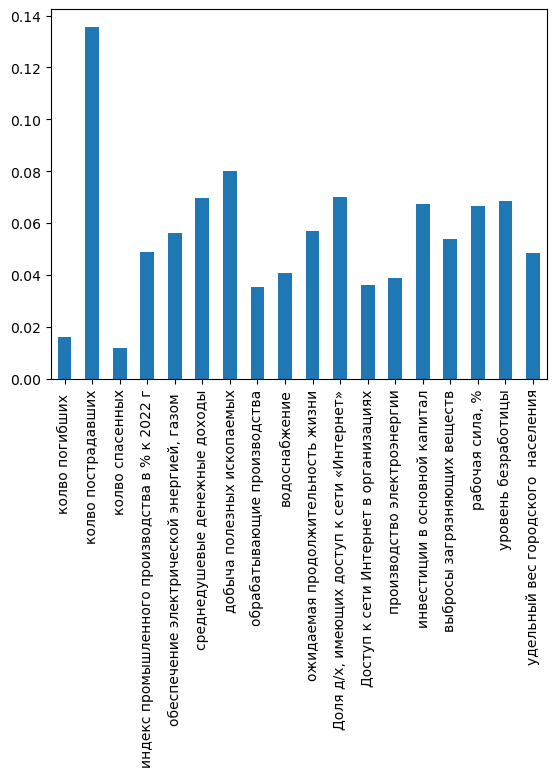

In [68]:
# Рассмотрим важность признаков на
# основании снижения неопределенности
importances = pd.Series(rf.feature_importances_, index = features.columns)
importances.plot.bar()
plt.show()

In [69]:
# Рассмотрим важность регрессоров на
# основании перестановок
importances2 = permutation_importance(estimator = rf,
                                      X = features_test,
                                      y = target_test,
                                      scoring = "accuracy")
importances2 = pd.Series(importances2["importances_mean"],
                         index = features_train.columns)
print(importances2)

колво погибших                                    0.000000
колво пострадавших                                0.164706
колво спасенных                                  -0.011765
индекс промышленного производства в % к 2022 г   -0.035294
обеспечение электрической энергией, газом        -0.011765
среднедушевые денежные доходы                     0.000000
добыча полезных ископаемых                       -0.011765
обрабатывающие производства                      -0.011765
водоснабжение                                     0.000000
ожидаемая продолжительность жизни                -0.047059
Доля д/х, имеющих доступ к сети «Интернет»        0.035294
Доступ к сети Интернет в организациях             0.000000
производство электроэнергии                       0.000000
инвестиции в основной капитал                    -0.011765
выбросы загрязняющих веществ                      0.011765
рабочая сила, %                                  -0.011765
уровень безработицы                              -0.0352

In [70]:
# Для удобства отсортируем признаки в порядке важности
importances2 = importances2.sort_values(ascending = False)
print(importances2)

колво пострадавших                                0.164706
Доля д/х, имеющих доступ к сети «Интернет»        0.035294
выбросы загрязняющих веществ                      0.011765
колво погибших                                    0.000000
среднедушевые денежные доходы                     0.000000
водоснабжение                                     0.000000
Доступ к сети Интернет в организациях             0.000000
производство электроэнергии                       0.000000
инвестиции в основной капитал                    -0.011765
рабочая сила, %                                  -0.011765
колво спасенных                                  -0.011765
обеспечение электрической энергией, газом        -0.011765
добыча полезных ископаемых                       -0.011765
обрабатывающие производства                      -0.011765
уровень безработицы                              -0.035294
индекс промышленного производства в % к 2022 г   -0.035294
ожидаемая продолжительность жизни                -0.0470

In [71]:
# Обучим случайный лес с тремя наиболее важными признаками
rf3 = deepcopy(rf)
n_important = 3
rf3.fit(features_train.loc[:, importances2.index[range(0, 3)]], target_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_samples=9,
                       oob_score=True, random_state=777)

In [72]:
# Сравним результаты на тестовой выборке
ACC_test_rf  = rf.score(features_test, target_test)
ACC_test_rf2 = rf2.score(features_test, target_test)
ACC_test_rf3 = rf3.score(features_test.loc[:, importances2.index[range(0, 3)]],
                         target_test)
print(pd.DataFrame(data    = [ACC_test_rf, ACC_test_rf2, ACC_test_rf3],
                   index   = ['Случайный лес 1',
                              'Случайный лес 2',
                              'Случайный лес 3'],
                   columns = ['ACC тест']))

                 ACC тест
Случайный лес 1  0.705882
Случайный лес 2  0.705882
Случайный лес 3  0.764706


**Регрессионные деревья**

In [112]:
target2 = df1['материальный ущерб от чс на душу населения']
features2 = df1[['колво погибших ', 'колво пострадавших', 'колво спасенных', 'индекс промышленного производства в % к 2022 г', 
         'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 
         'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 
         'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 
         'уровень безработицы', 'удельный вес городского  населения']]
target2   = np.squeeze(target2)                             # преобразуем из вектора столбца
                                                            # в одномерный массив

In [113]:
# Разделим выборку на обучающую и тестовую
features2_train, features2_test, target2_train, target2_test = train_test_split(
    features2, target2, test_size = 0.2, random_state = 777)

# Сохраним число наблюдений обучающей и тестовой выборок
n_train = len(target2_train)
n_test  = len(target2_test)

# Вернем исходную сортировку индексов
features2_train = features2_train.reset_index(drop = True)
target2_train   = target2_train.reset_index(drop = True)
features2_test  = features2_test.reset_index(drop = True)
target2_test    = target2_test.reset_index(drop = True)

In [114]:
# Обучим регрессионное дерево
rt = tree.DecisionTreeRegressor(max_depth = 10, criterion = 'squared_error')
rt.fit(features2_train, target2_train)

DecisionTreeRegressor(max_depth=10)

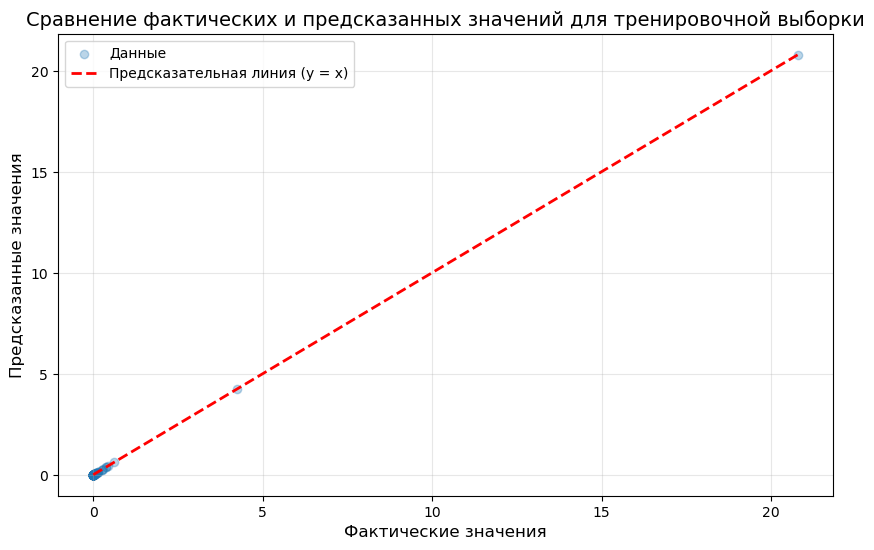

In [115]:
# Предсказание на тренировочных данных
predicted_train = rt.predict(features2_train)

# Настройка графика
plt.figure(figsize=(10, 6))
plt.scatter(target2_train, predicted_train, alpha=0.3, label='Данные')
plt.plot([target2_train.min(), target2_train.max()], 
         [target2_train.min(), target2_train.max()], 
         'r--', lw=2, label='Предсказательная линия (y = x)')

# Подписи и оформление
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение фактических и предсказанных значений для тренировочной выборки', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

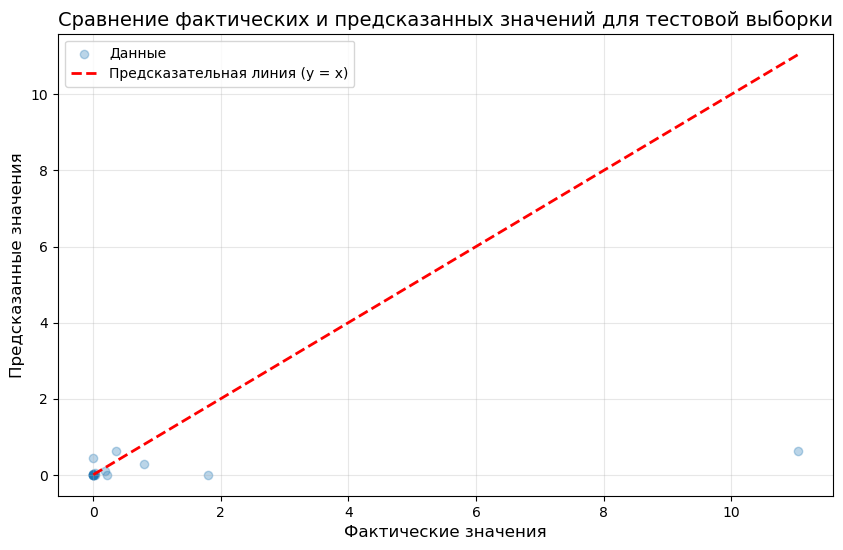

In [116]:
# Предсказание на тренировочных данных
predicted_test = rt.predict(features2_test)

# Настройка графика
plt.figure(figsize=(10, 6))
plt.scatter(target2_test, predicted_test, alpha=0.3, label='Данные')
plt.plot([target2_test.min(), target2_test.max()], 
         [target2_test.min(), target2_test.max()], 
         'r--', lw=2, label='Предсказательная линия (y = x)')

# Подписи и оформление
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение фактических и предсказанных значений для тестовой выборки', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [128]:
ACC_test_rt  = rt.score(features2_test, target2_test)
print(pd.DataFrame(data    = [ACC_test_rt],
                   index   = ['Регрессионное дерево'],
                   columns = ['ACC тест']))

                      ACC тест
Регрессионное дерево  0.010446


In [117]:
# Обучим случайный лес из регрессионных деревьев
rfr = RandomForestRegressor(max_depth    = 10,              # максимальная глубина деревьев
                            max_features = "sqrt",          # число случайно выбираемых на
                                                            # каждой итерации признаков
                            max_samples  = 9,             # число бутстрап итераций
                            random_state = 777,             # для воспроизводимости
                            criterion    = 'squared_error') # критерий выбора признаков
                                                            # при разбиении узлов
rfr.fit(features2_train, target2_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=9,
                      random_state=777)

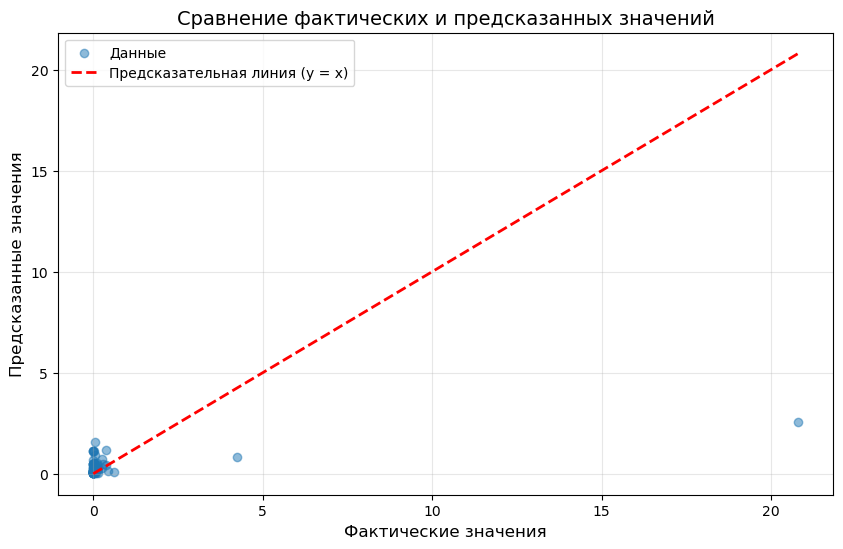

In [118]:
# Предсказание на тренировочных данных
predicted_train = rfr.predict(features2_train)

# Настройка графика
plt.figure(figsize=(10, 6))
plt.scatter(target2_train, predicted_train, alpha=0.5, label='Данные')
plt.plot([target2_train.min(), target2_train.max()], 
         [target2_train.min(), target2_train.max()], 
         'r--', lw=2, label='Предсказательная линия (y = x)')

# Подписи и оформление
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение фактических и предсказанных значений', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

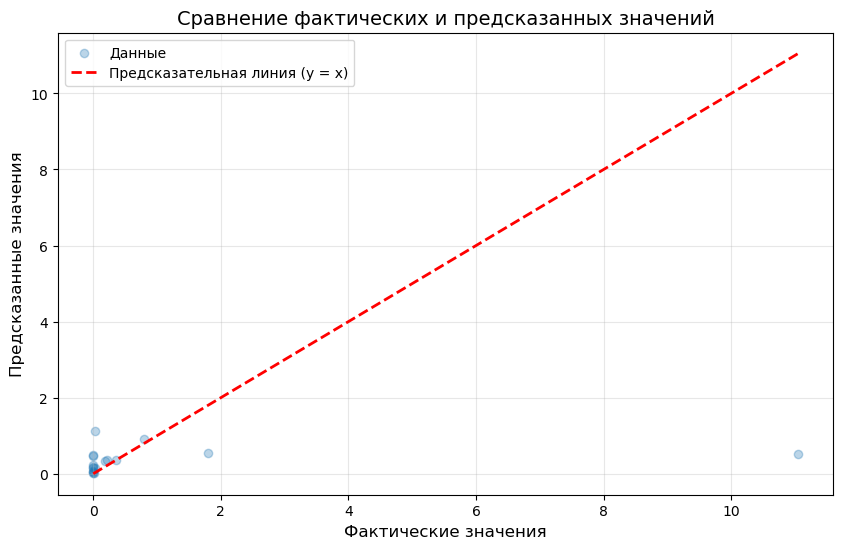

In [119]:
# Предсказание на тренировочных данных
predicted_test = rfr.predict(features2_test)

# Настройка графика
plt.figure(figsize=(10, 6))
plt.scatter(target2_test, predicted_test, alpha=0.3, label='Данные')
plt.plot([target2_test.min(), target2_test.max()], 
         [target2_test.min(), target2_test.max()], 
         'r--', lw=2, label='Предсказательная линия (y = x)')

# Подписи и оформление
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение фактических и предсказанных значений', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [120]:
# Оценим МНК регрессию
ls = LinearRegression()
ls.fit(features2_train, target2_train)

LinearRegression()

In [121]:
# Достанем прогнозы моделей
predict_test_rt  = rt.predict(features2_test)
predict_test_rfr = rfr.predict(features2_test)
predict_test_ls  = ls.predict(features2_test)

In [122]:
# Сравним MSE моделей на тестовой выборке
MSE_test_rt  = sklearn.metrics.mean_squared_error(target2_test, predict_test_rt)
MSE_test_rfr = sklearn.metrics.mean_squared_error(target2_test, predict_test_rfr)
MSE_test_ls  = sklearn.metrics.mean_squared_error(target2_test, predict_test_ls)
print(pd.DataFrame(data    = [MSE_test_rt, MSE_test_rfr, MSE_test_ls],
                   index   = ['Регрессионное дерево', 'Случайный лес', 'МНК'],
                   columns = ['MSE тест']))

                      MSE тест
Регрессионное дерево  6.620815
Случайный лес         6.728838
МНК                   8.634446


для регрессионного дерева

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import numpy as np

# Предсказания и остатки
y_pred = rt.predict(features2)
residuals = target2 - y_pred

# Стандартное отклонение остатков
sigma = np.std(residuals)

# Логарифмическое правдоподобие
log_likelihood = -0.5 * len(target2) * np.log(2 * np.pi * sigma**2) - np.sum(residuals**2) / (2 * sigma**2)

# Расчет AIC/BIC
k = rt.tree_.node_count
n = len(target2)
aic = -2 * log_likelihood + 2 * k
bic = -2 * log_likelihood + np.log(n) * k

print(f"AIC: {aic:.2f}, BIC: {bic:.2f}")

AIC: 419.10, BIC: 607.18


In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import numpy as np

# Предсказания и остатки
y_pred2 = rfr.predict(features2)
residuals2 = target2 - y_pred2

# Стандартное отклонение остатков
sigma = np.std(residuals2)

# Логарифмическое правдоподобие
log_likelihood = -0.5 * len(target2) * np.log(2 * np.pi * sigma**2) - np.sum(residuals2**2) / (2 * sigma**2)

# Расчет AIC/BIC
total_nodes = sum(tree.tree_.node_count for tree in rf.estimators_)
k = total_nodes
n = len(target2)
aic = -2 * log_likelihood + 2 * k
bic = -2 * log_likelihood + np.log(n) * k

print(f"AIC: {aic:.2f}, BIC: {bic:.2f}")

AIC: 1418.96, BIC: 2679.37


предсказанные и фактические зачения

**кластеризация**

Используем раннее созданный датасет без мультиколлинеарности

In [84]:
df2 = df_scaled[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'материальный ущерб от чс на душу населения', 'индекс промышленного производства в % к 2022 г', 
         'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 
         'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 
         'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 
         'уровень безработицы', 'удельный вес городского  населения']]

In [85]:
df2.head()

,ЧС,колво погибших,колво пострадавших,колво спасенных,материальный ущерб от чс на душу населения,индекс промышленного производства в % к 2022 г,"обеспечение электрической энергией, газом",среднедушевые денежные доходы,добыча полезных ископаемых,обрабатывающие производства,водоснабжение,ожидаемая продолжительность жизни,"Доля д/х, имеющих доступ к сети «Интернет»",Доступ к сети Интернет в организациях,производство электроэнергии,инвестиции в основной капитал,выбросы загрязняющих веществ,"рабочая сила, %",уровень безработицы,удельный вес городского населения
0,-0.227452,-0.47123,-0.211893,-0.161824,-0.193043,-1.001737,-0.438012,-0.444978,-0.281687,-0.477800,-0.454815,0.136763,1.213815,-1.583681,-0.431096,-0.323771,-0.257585,-1.327469,0.738147,-0.916405
1,-0.086332,0.00751,-0.211016,-0.161824,0.506047,-0.632303,0.019020,0.869125,1.508608,-0.551228,-0.344478,0.605840,0.653826,-0.255367,-0.199695,0.427953,0.368211,1.017453,0.477324,-0.287159
2,-0.227452,-0.47123,-0.200611,-0.128505,-0.187427,-0.577572,-0.414621,-0.267596,-0.091601,-0.555683,-0.463090,-0.354030,-0.965604,-0.145977,-0.352081,-0.211807,-0.189858,-0.120182,1.114892,-0.108484
3,-0.368571,-0.31165,-0.211831,-0.161824,-0.199233,3.294641,-0.481196,1.558275,-0.338654,-0.467852,-0.485158,0.260547,0.578151,-0.224113,-0.668141,-0.346145,-0.428256,1.690747,-0.565969,0.551836
4,0.619266,0.32667,1.467224,4.386169,1.456510,-2.328962,0.032515,0.241901,-0.336678,-0.372298,-0.239658,0.171509,0.426803,0.057177,-0.109393,0.002962,0.002486,0.228073,-0.421068,0.582909


In [86]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

In [87]:
X1 = df_scaled[['ЧС', 'колво погибших ', 'колво пострадавших', 'колво спасенных', 'материальный ущерб от чс на душу населения', 'индекс промышленного производства в % к 2022 г', 
         'обеспечение электрической энергией, газом ', 'среднедушевые денежные доходы', 'добыча полезных ископаемых', 'обрабатывающие производства', 
         'водоснабжение', 'ожидаемая продолжительность жизни', 'Доля д/х, имеющих доступ к сети «Интернет»', 'Доступ к сети Интернет в организациях', 
         'производство электроэнергии', 'инвестиции в основной капитал', 'выбросы загрязняющих веществ', 'рабочая сила, %', 
         'уровень безработицы', 'удельный вес городского  населения']]
y1 = df1['субъект']

In [88]:
numeric_columns = X1.columns.tolist()
data = X1[numeric_columns]